# Problem Statement
- A US-based housing company named Surprise Housing has decided to enter the Australian market.__
- The company is looking at prospective properties to buy to enter the market.
- Need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

__The company wants to know:__

- __Which variables are significant in predicting the price of a house__

- __How well those variables describe the price of a house.__



In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE

In [2]:
# Loading data to pandas dataframe
data = pd.read_csv('train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
data.drop(['Id'], inplace=True, axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# check for missing values
features = []
percentage_missing = []

for col in data.columns:
    if data[col].isna().sum()/len(data.index)>0:
        features.append(col) 
        percentage_missing.append((data[col].isna().sum()/len(data.index))*100)
missing = {"features":features, 'percentage_missing':percentage_missing}
missing_values = pd.DataFrame.from_dict(missing)
fig = px.bar(missing_values.sort_values(by="percentage_missing", ascending=False), x='features', y='percentage_missing')
fig.update_layout(title_text='% of missing values', title_x=0.5)
fig.show()

In [6]:
# checking for duplicate columns
data.duplicated().sum()

0

In [7]:
categorical_col = data.select_dtypes(include=['object'])
numerical_col = data.select_dtypes(exclude=['object'])

In [8]:
# numerical features
numerical_col.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
# categorical features
categorical_col.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
numerical_col.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [11]:
categorical_col.describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

## Data cleaning and handling missing values

- Below variable are explained in data dictonary. Below features are not available in the property.
    - Alley
    - MasVnrType
    - BsmtQual
    - BsmtCond
    - BsmtExposure
    - BsmtFinType1
    - BsmtFinType2
    - FireplaceQu
    - GarageType
    - GarageFinish
    - GarageQual
    - GarageCond
    - PoolQC
    - Fence
    - MiscFeature
- Electrical: NA is not given in data dictonary, so imputing with mode.
- Impute LotFrontage with median
- Impute MasVnrArea with 0
- Backfill GarageYrBlt variable 

## Missing values imputation

In [12]:
# Impute with None
data.Alley.fillna("Alley_None", inplace=True)
data.MasVnrType.fillna("MasVnrTypeNone", inplace=True)
data.BsmtQual.fillna("BsmtQual_None", inplace=True)
data.BsmtCond.fillna("BsmtCond_None", inplace=True)
data.BsmtExposure.fillna("BsmtExposure_None", inplace=True)
data.BsmtFinType1.fillna("BsmtFinType1_None", inplace=True)
data.BsmtFinType2.fillna("BsmtFinType2_None", inplace=True)
data.FireplaceQu.fillna("None", inplace=True)
data.GarageType.fillna("FireplaceQu_None", inplace=True)
data.GarageFinish.fillna("GarageFinish_None", inplace=True)
data.GarageQual.fillna("GarageQual_None", inplace=True)
data.GarageCond.fillna("GarageCond_None", inplace=True)
data.PoolQC.fillna("PoolQC_None", inplace=True)
data.Fence.fillna("Fence_None", inplace=True)
data.MiscFeature.fillna("MiscFeature_None", inplace=True)

# Impute with mode
data.Electrical.fillna(data.Electrical.mode()[0], inplace=True)


# Impute with median
data.LotFrontage.fillna(data.LotFrontage.median(), inplace=True)

#Impute with 0
data.MasVnrArea.fillna(0, inplace=True)
data.GarageYrBlt.fillna(method='bfill', inplace=True)

In [13]:
# Check if any variable has missing values
for i in data.columns:
    if data[i].isna().sum()>0:
        print(i)

In [14]:
# look for variables with 80% values are same. As majority of the data is same in the variables, droping them. 

for col in data.columns:
    if data[col].value_counts().max() > 80 * (len(data.index)/100):
        data.drop([col], inplace=True, axis=1)

In [15]:
data.shape

(1460, 47)

In [16]:
categorical_col = data.select_dtypes(include=['object'])

In [17]:
# Visualizing categorical variables
for col in categorical_col.columns:
    a = categorical_col[col].value_counts().reset_index()
    fig = px.bar(a, x='index', y=col, labels={
                     "index": col,
                     col: "count",
                 })
    fig.update_layout(title_text=col, title_x=0.5)
    fig.show()

### Insights
- MSZoning :- RL is most prefered
- LotShape:- Reg is most prefered
- LogConfig:- Inside is prefered
- Neighborhood:- North Ames and College Creek are most prefered
- Homestyle:-  1 story and 2 story are mosted prefered
- Roof style:- Gable is mosted prefered
- Exterior1st:- Vinyl Siding is most prefered
- Exterior2nd:- Vinyl Siding is most prefered
- Masonry veneer type:- none is most prefered followed by Brick face
- ExterQual: Average is prefered most
- Foundation: PConc and CBlock are prefered
- Basment quality:- Average and Good are prefered
- Heating quality:- Excelent, average prefered
- Kitchen quality:- Excelent, Good are most prefered
- Attached and unfurnished Garage are most prefered.

In [18]:
# deriving new variables
# property age
# Garage age

data['property_age'] = data['YrSold'] - data['YearBuilt']
data['property_age'] = data['property_age'].astype(int)
data['Garage_Age'] = data.YrSold - data.GarageYrBlt
data['Garage_Age'] = data['Garage_Age'].astype(int)

# Renovated or not
data['Remodeled'] = data['YearBuilt'] - data['YearRemodAdd']
data['Remodeled'] = data['Remodeled'].apply(lambda x : 0 if x == 0 else 1)

In [19]:
# Discrete Numerical Variables
discrete_col = ['MSSubClass','MoSold','OverallQual','OverallCond','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',\
                    'TotRmsAbvGrd','Fireplaces','GarageCars','Remodeled']

In [20]:
# Visualizing discrete variables
for col in discrete_col:
    a = data[col].value_counts().reset_index()
    fig = px.bar(a, x='index', y=col, labels={
                     "index": col,
                     col: "count",
                 })
    
    fig.update_layout(title_text=col+" Analysis", title_x=0.5)
    fig.show()

### Insights
- 20	1-STORY 1946 & NEWER ALL STYLES and 60	2-STORY 1946 & NEWER dwellings are more prefered.
- most houses are sold in May, June and july months 
- Overall quality: Average, above average and good houses are the most sold ones
- Overall condition:- Average is most prefered
- Basement full bathroom:- 0 and 1 are prefered
- Full Bathroom:- 1 and 2 are most prefered
- Half Bathroom:- 0 and 1 are prefered
- Bedrooms above ground:- 3, 2, 4 are most prefered
- Total rooms above ground:- 6,7, 5 are prefered
- Fireplace: none or 1 is prefered
- Garage Cars:- 2 followed by 1 is prefered.
- not much difference in whether remodeled or not.

In [21]:
# As we have Age of the property and remodeled information in new derived columns we can 
# drop 'YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'

data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], inplace=True, axis=1)

In [22]:
data.shape

(1460, 46)

In [23]:
numerical_col = data.select_dtypes(exclude=['object'])

In [24]:
# Visualizing numerica variables
for col in numerical_col.columns:
    fig = px.box(numerical_col, y=col)
    
    fig.update_layout(title_text=col+" Box plot", title_x=0.5)
    fig.show()

In [25]:
# Most of the variable have potential outliers will be dealing with them below

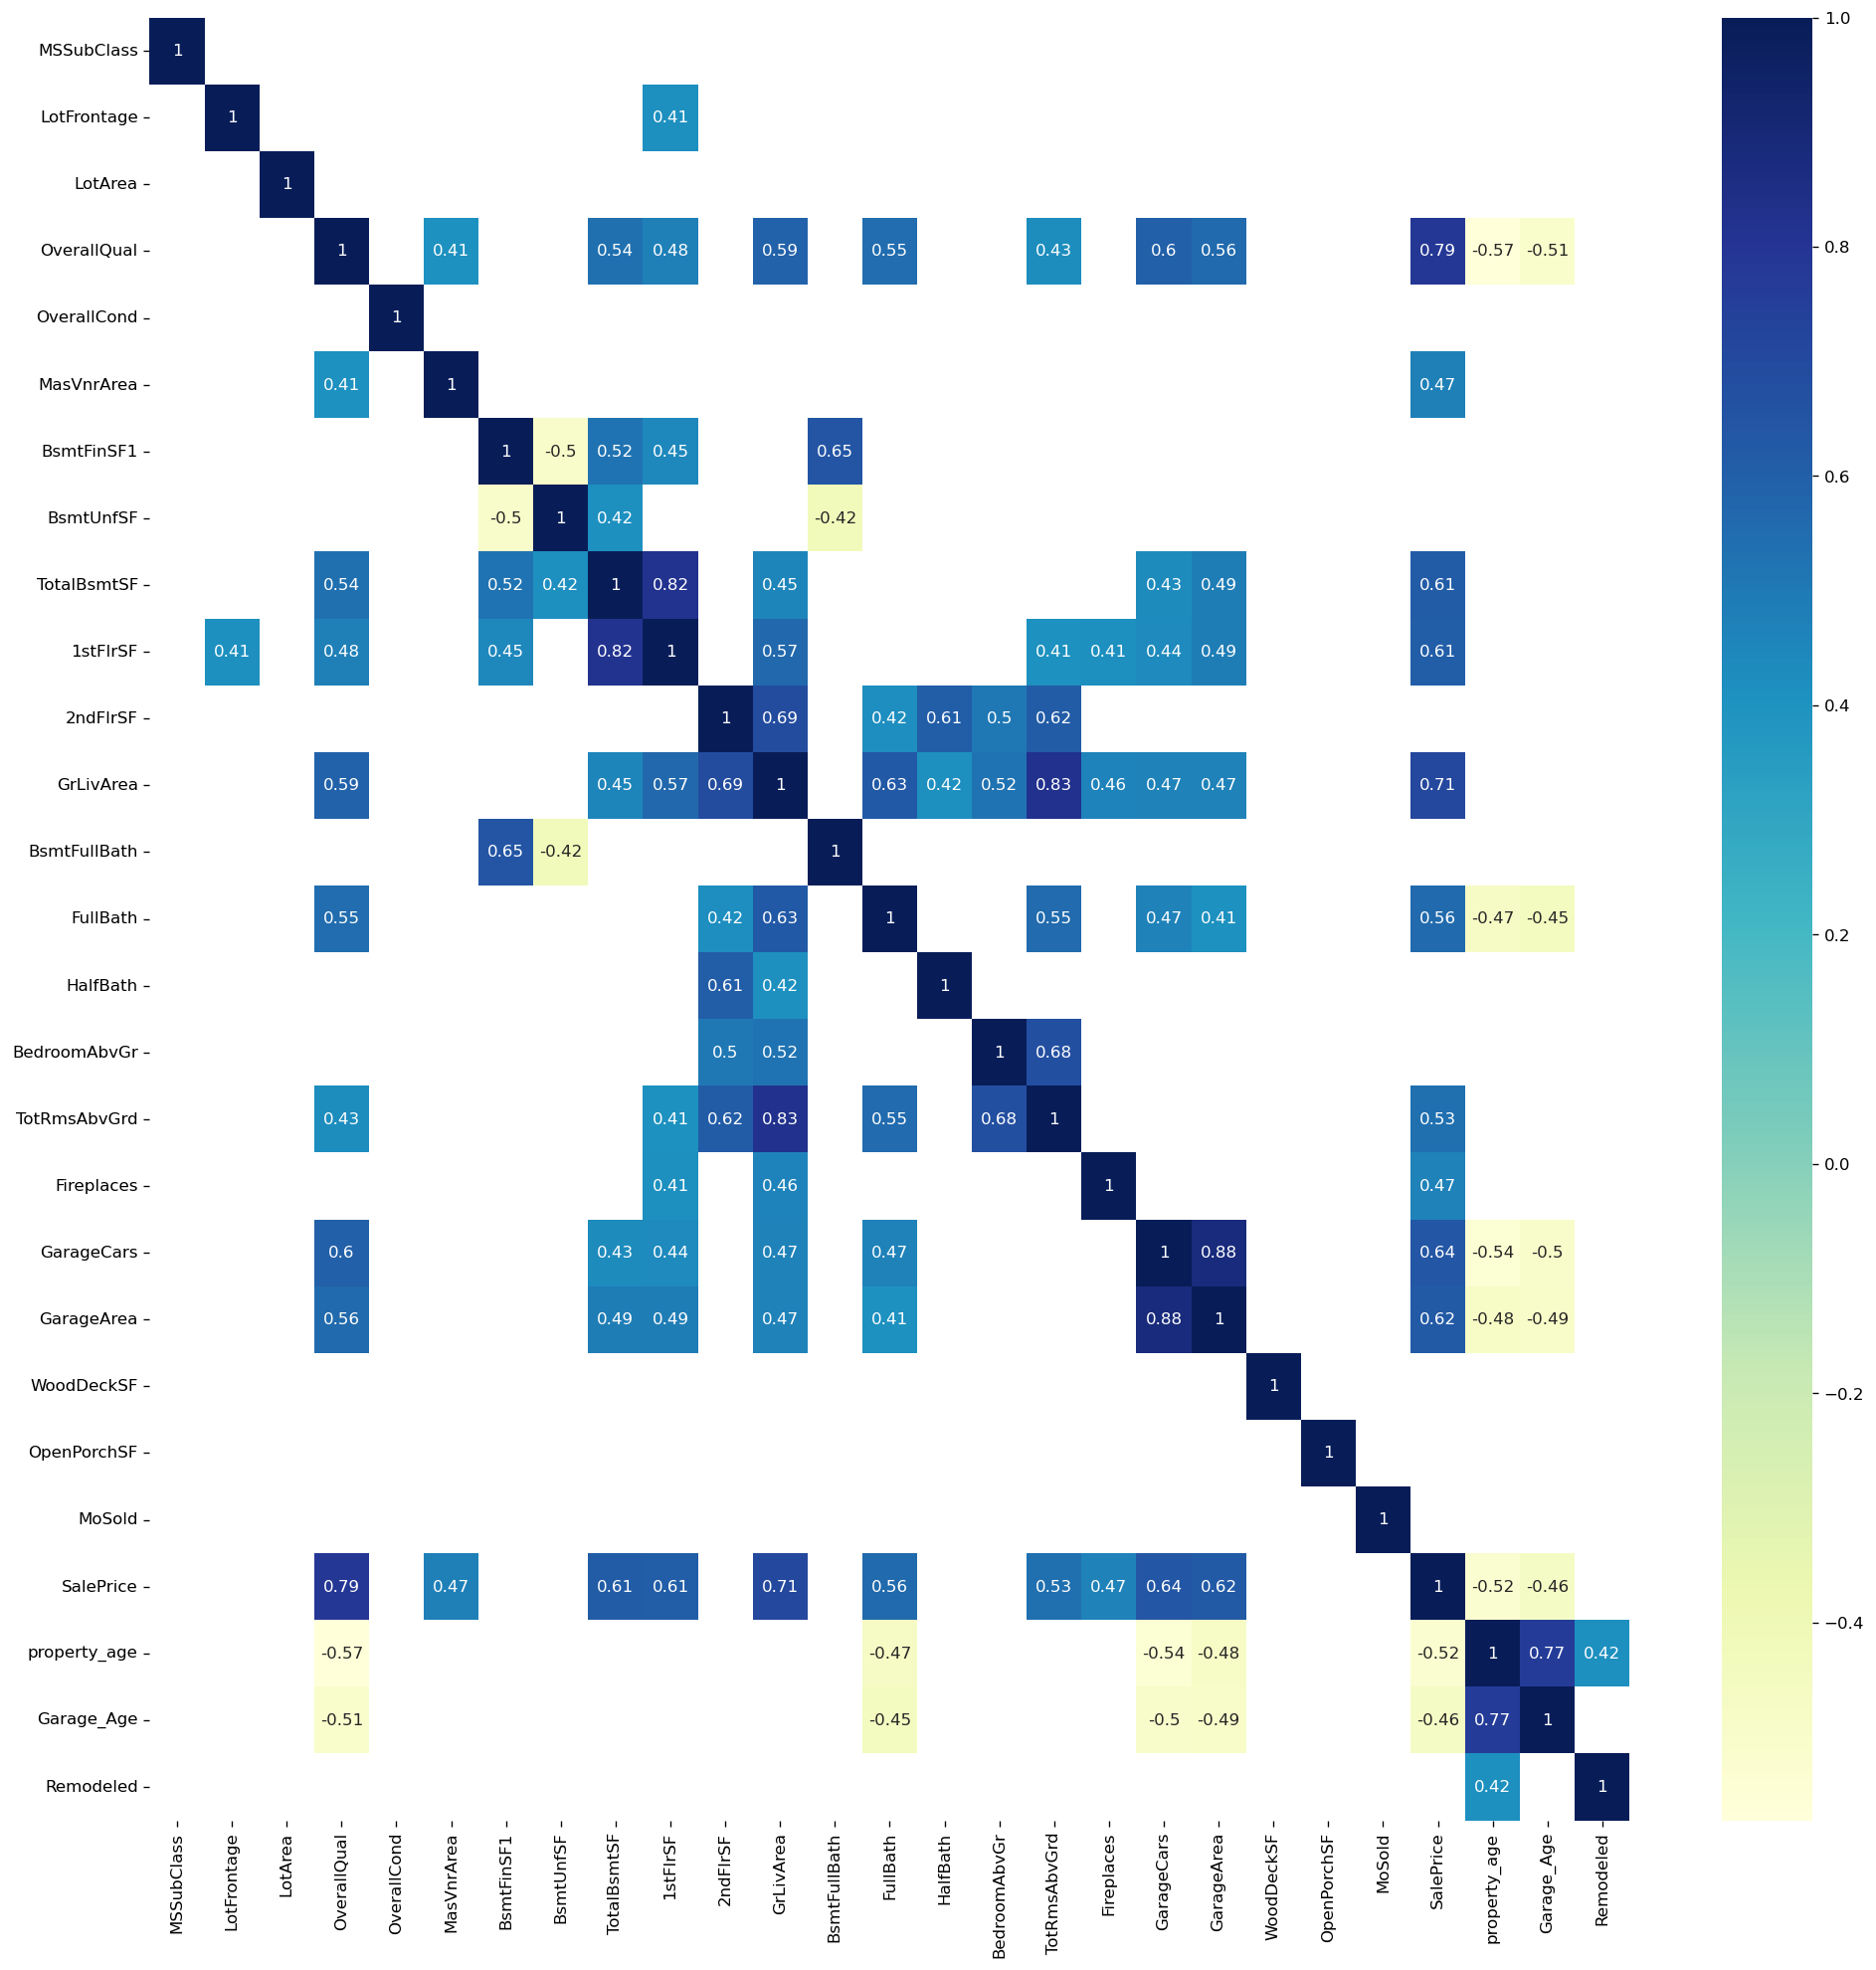

In [26]:
corr = data.corr() 
plt.figure(figsize=(20, 20),dpi=120)

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], cmap='YlGnBu', annot=True);

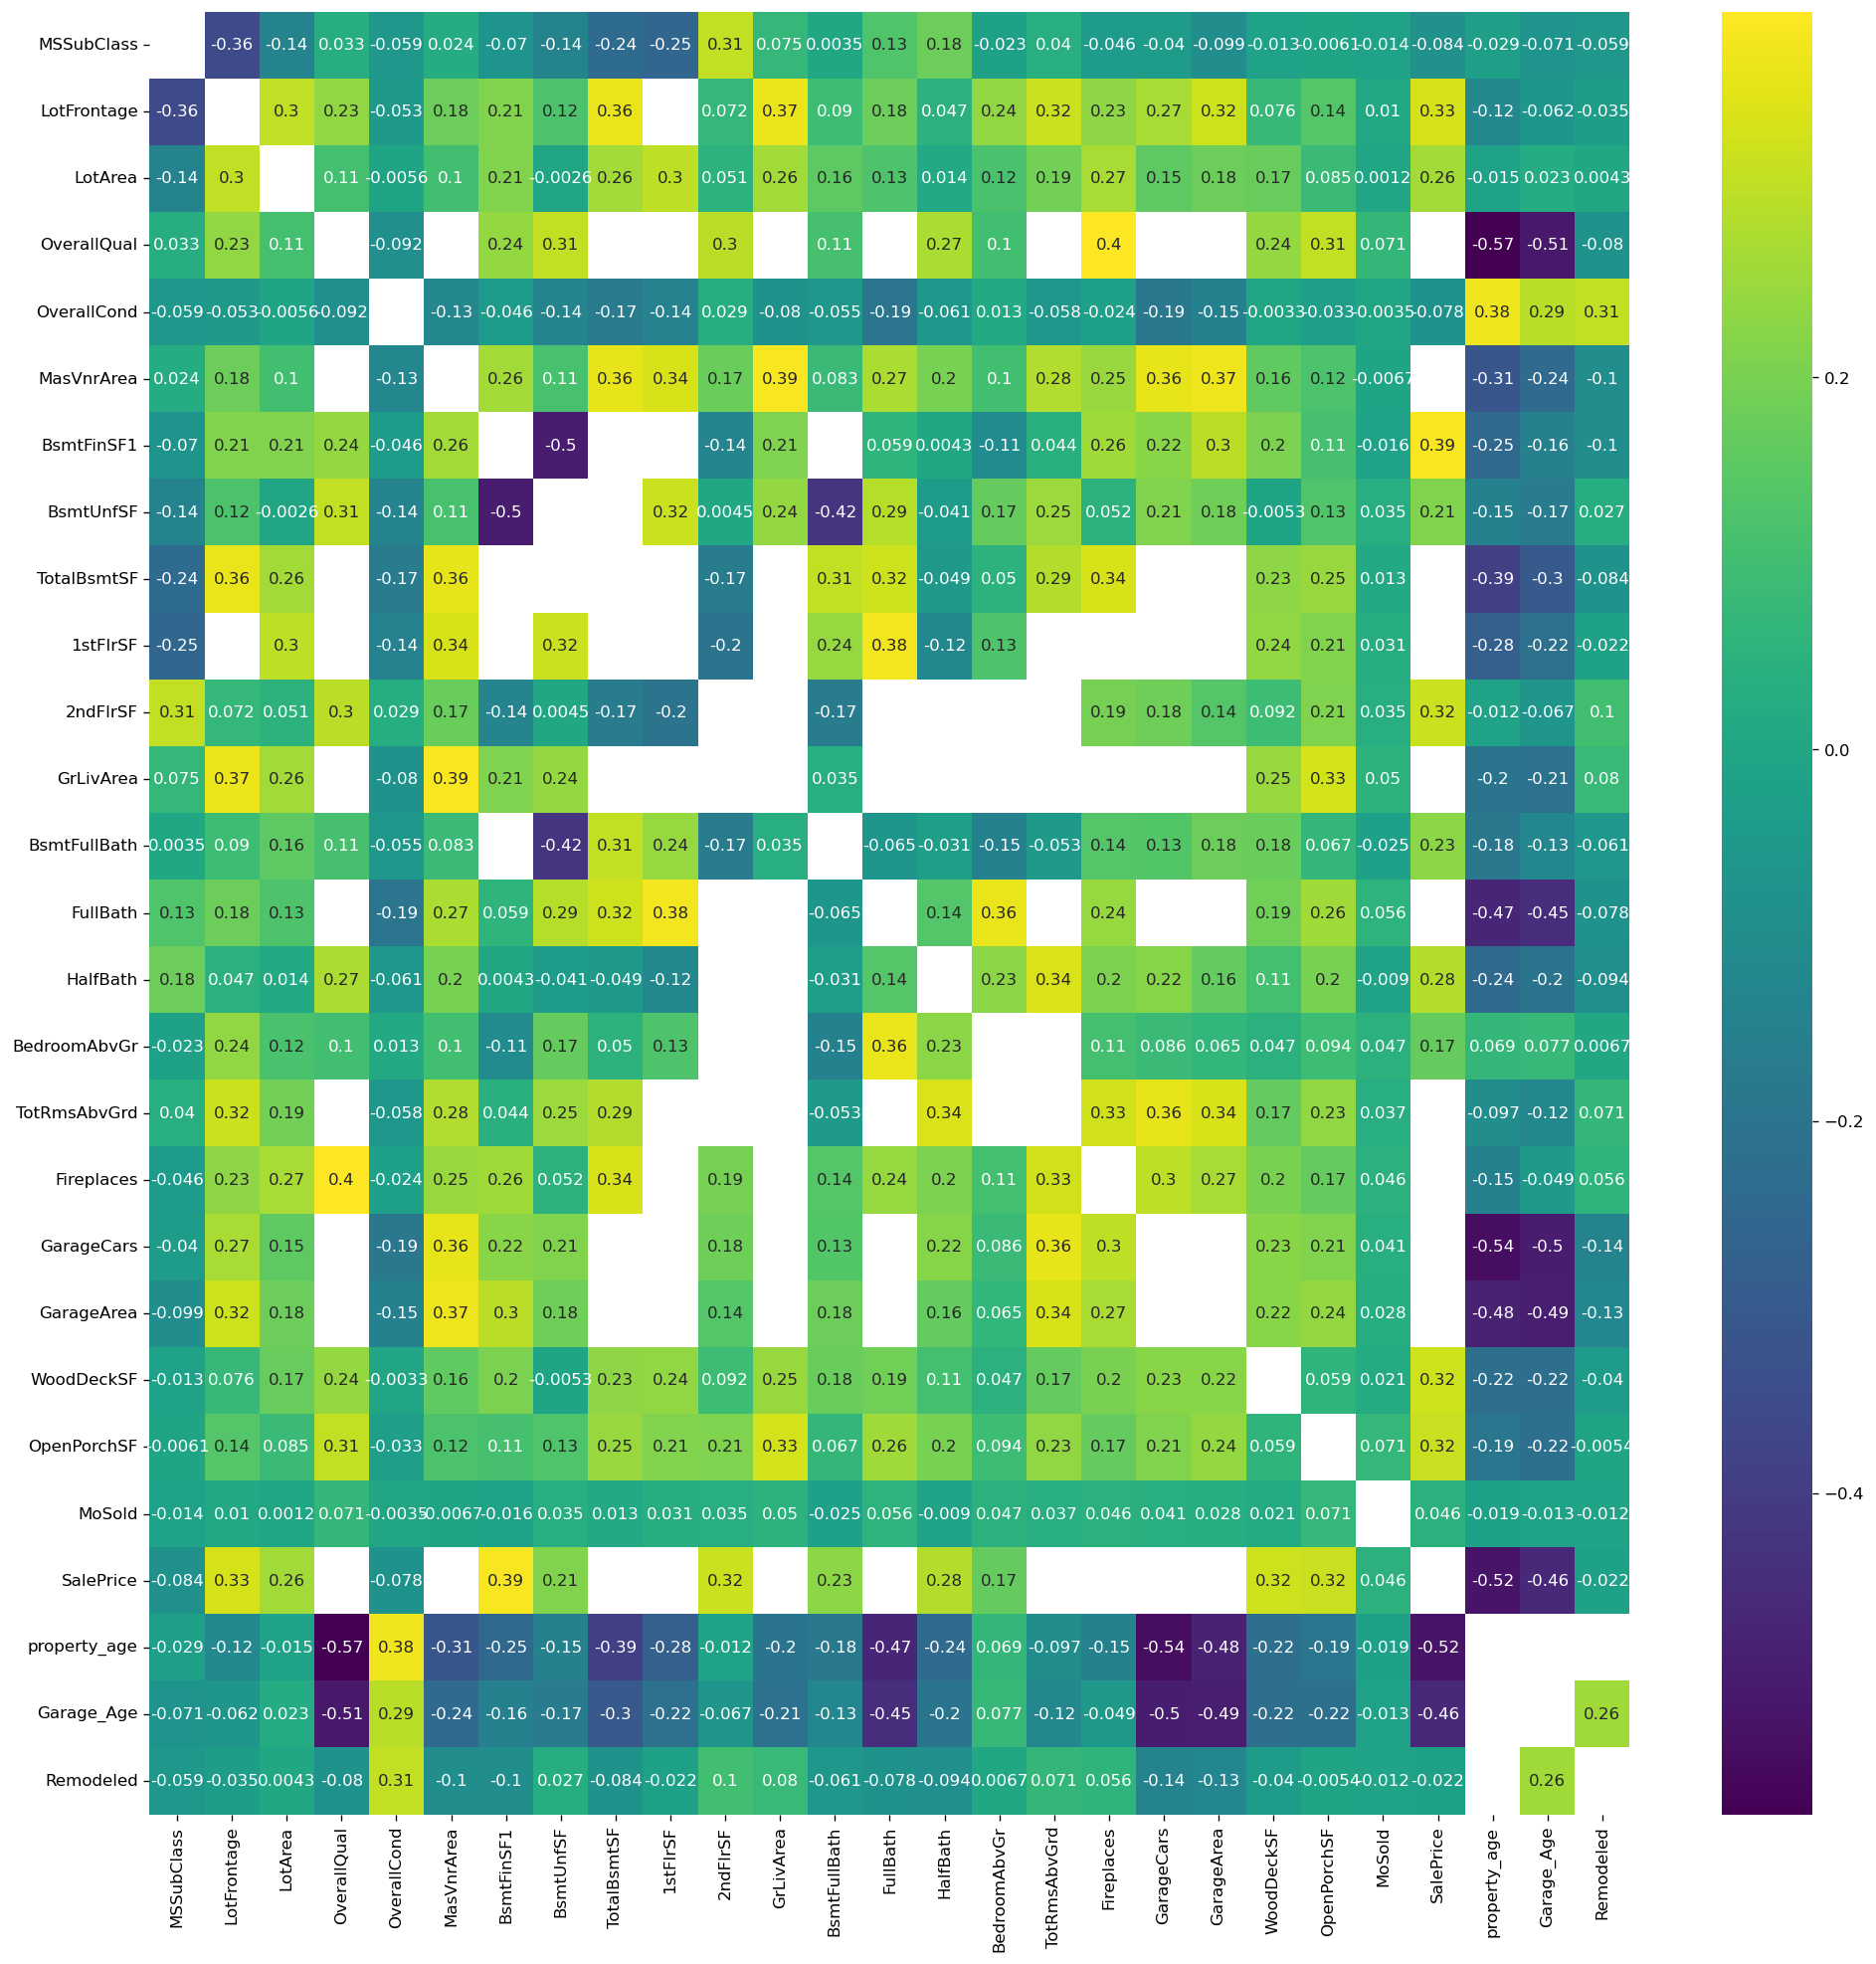

In [27]:
corr = data.corr() 
plt.figure(figsize=(20, 20),dpi=120)

sns.heatmap(corr[(corr < 0.4) | (corr < -0.4)], cmap='viridis', annot=True);

### Insights:-
- The predictors 'GrLivArea' and 'TotRmsAbvGrd' shows (0.83) strong positive correlation
- The predictors 'GarageCars' and 'GarageArea' shows (0.88) strong positive correlation
- The predictors 'GrLivArea' and '2ndFlrSF' shows (0.69) strong positive correlation
- The predictors '1stFlrSF' and 'TotalBsmtSF' shows (0.82) strong positive correlation

In [28]:
# dropping the highly correlated variables.
data = data.drop(['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF'], axis = 1)
data.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond  ... GarageType GarageFinish  \
0     2Story            7            5  ...     Attchd          RFn   
1     1Story            6            8  ...     Attchd          RFn   
2     2Story            7            5  ...     Attchd          RFn   
3     2Story            7            5  ...     Detchd          Unf   
4     2Story            8            5  ...     Attchd          RFn   

  GarageArea WoodDeckSF  OpenPorchSF MoSold SalePrice property_age Garage_Age  \
0        548          0           61      2    208500            5          5   
1        460        298            0      5    181500           31         31   
2        608          0           42      9    223500            7          7   
3        642          0           35      2    140000           91          8   
4        836        192           84     12    250000            8          8   

  Remodeled  
0         0  
1         0  
2         1  
3         1  
4         0  

[5 rows x 42 columns]

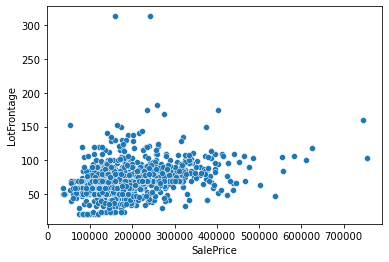

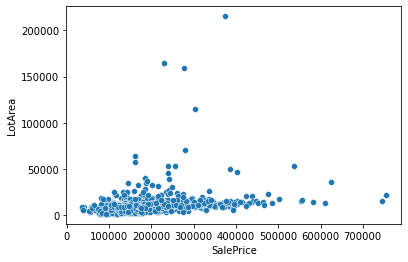

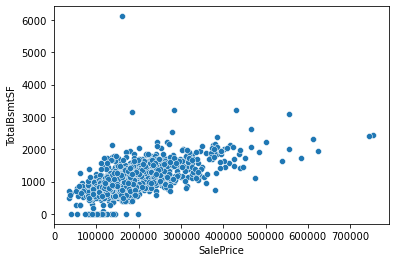

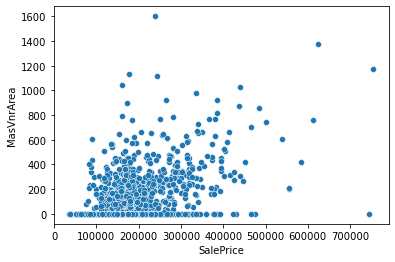

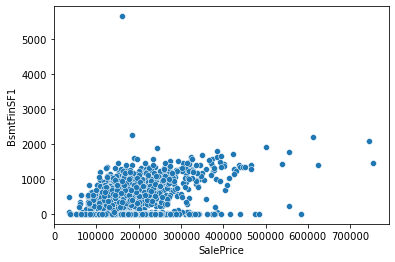

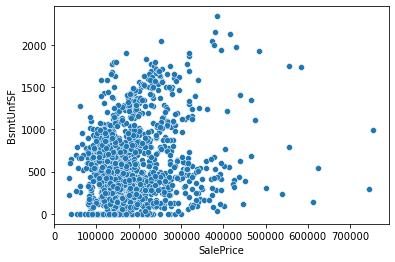

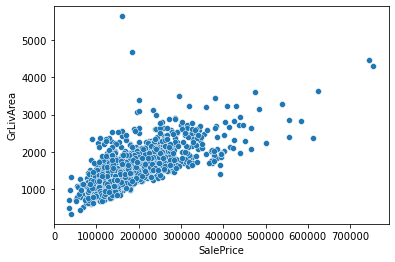

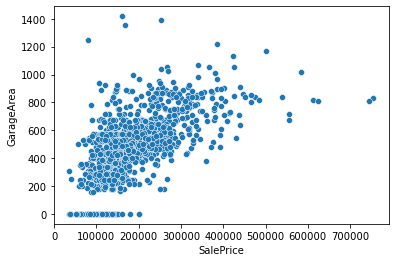

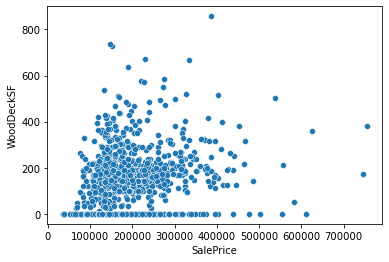

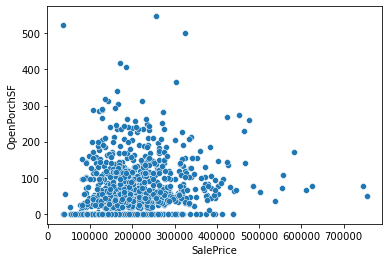

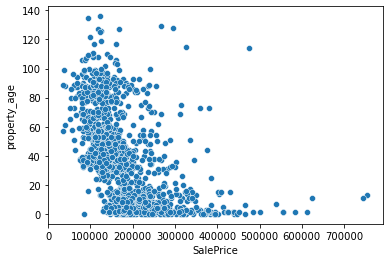

In [29]:
# Correlation of predictor variable with target
numerical_variables = ['LotFrontage', 'LotArea','TotalBsmtSF','MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', 'GrLivArea','GarageArea', 'WoodDeckSF','OpenPorchSF', 'property_age']
for i in numerical_variables:
    sns.scatterplot(data=data, x='SalePrice', y=i)
    plt.show()
    

### Insights:- 
- TotalBsmtSF, MasVnrArea, 'GrLivArea' showing positive correlation
- property_age has some negative correlation

In [30]:
# Based on the 'LotFrontage', 'MasVnrArea', and 'GarageArea' scatterplots w.r.t. SalePrice, removing outlier datapoints 

data = data.loc[data['LotFrontage']<250]
data = data.loc[data['MasVnrArea']<1200]
data = data.loc[data['GarageArea']<1200]

In [31]:
# Converting catergorical variables to discrete variables based on details provided in data dictonary.
data['LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) 
data['ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'BsmtQual_None': 0})

data['BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'BsmtExposure_None': 0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'BsmtFinType1_None': 0})
data['HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

data['KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'GarageFinish_None': 0 })

data.shape

(1452, 42)


 mu = 180435.02 and sigma = 78492.09



Text(0.5, 1.0, 'SalePrice Distribution')

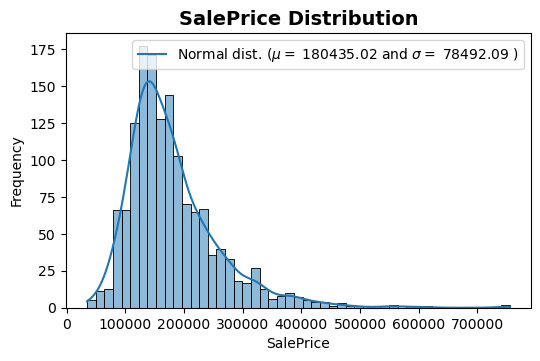

In [32]:
# Visualising the target variable 'SalePrice'
from scipy import stats
from scipy.stats import norm

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.histplot(data['SalePrice'], kde=True)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title('SalePrice Distribution', fontsize=14, fontweight='bold')



 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice Distribution (After Log-Transformation)')

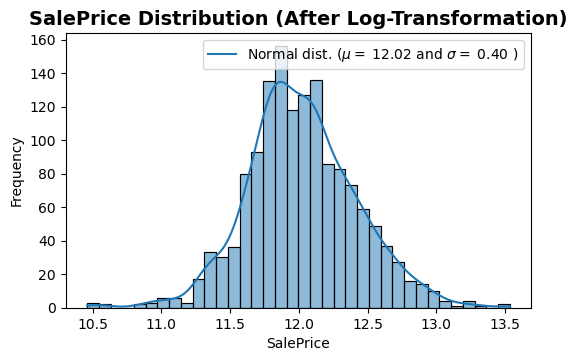

In [33]:
#Tranforming the target variable 'SalePrice' using Log-Transform. 

from scipy import stats
from scipy.stats import norm

##Using the numpy fuction log1p which that applies log(1+x) to all elements of the target variable column
data["SalePrice"] = np.log1p(data["SalePrice"])

plt.figure(figsize=(6,8), dpi=100)
plt.subplot(211)
sns.histplot(data['SalePrice'], kde=True)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency', fontsize=10)
plt.title("SalePrice Distribution (After Log-Transformation)", fontsize=14, fontweight='bold')


In [34]:
px.box(data.SalePrice)

In [35]:
# Removing outliers in SalePrice

In [36]:
data = data.loc[(data['SalePrice']>11)]
data = data.loc[(data['SalePrice']<13.1)]

In [37]:
# Removing outliers beyond 99 quantile for LotArea, TotalBsmtSF, WoodDeckSF, OpenPorchSF

q_LotArea = data['LotArea'].quantile(0.99)
data = data[data["LotArea"] < q_LotArea]

q_TotalBsmtSF = data['TotalBsmtSF'].quantile(0.99)
data = data[data["TotalBsmtSF"] < q_TotalBsmtSF]


q_WoodDeckSF = data['WoodDeckSF'].quantile(0.99)
data = data[data["WoodDeckSF"] < q_WoodDeckSF]


q_OpenPorchSF = data['OpenPorchSF'].quantile(0.99)
data = data[data["OpenPorchSF"] < q_OpenPorchSF]


In [38]:
data.shape

(1374, 42)

## Preparing the Data for Modeling
- Encoding:
 - Convering binary variables to 1/0.
 - Other categorical variables to dummy variables.
- Spliting into train and test
- Rescaling of variables

## Creating dummy variables

In [39]:
categorical_col = data.select_dtypes(include=['object'])

In [40]:
for col in categorical_col.columns:
    X = pd.get_dummies(data[col], drop_first = True)
    data = pd.concat([data, X], axis = 1)
    data.drop([col], inplace=True, axis=1)

In [41]:
data.shape

(1374, 120)

In [42]:
categorical_col = data.select_dtypes(include=['object'])
categorical_col.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374 entries, 0 to 1458
Columns: 120 entries, MSSubClass to FireplaceQu_None
dtypes: float64(3), int64(29), uint8(88)
memory usage: 472.3 KB


In [44]:
# all variables are converted into numerical.

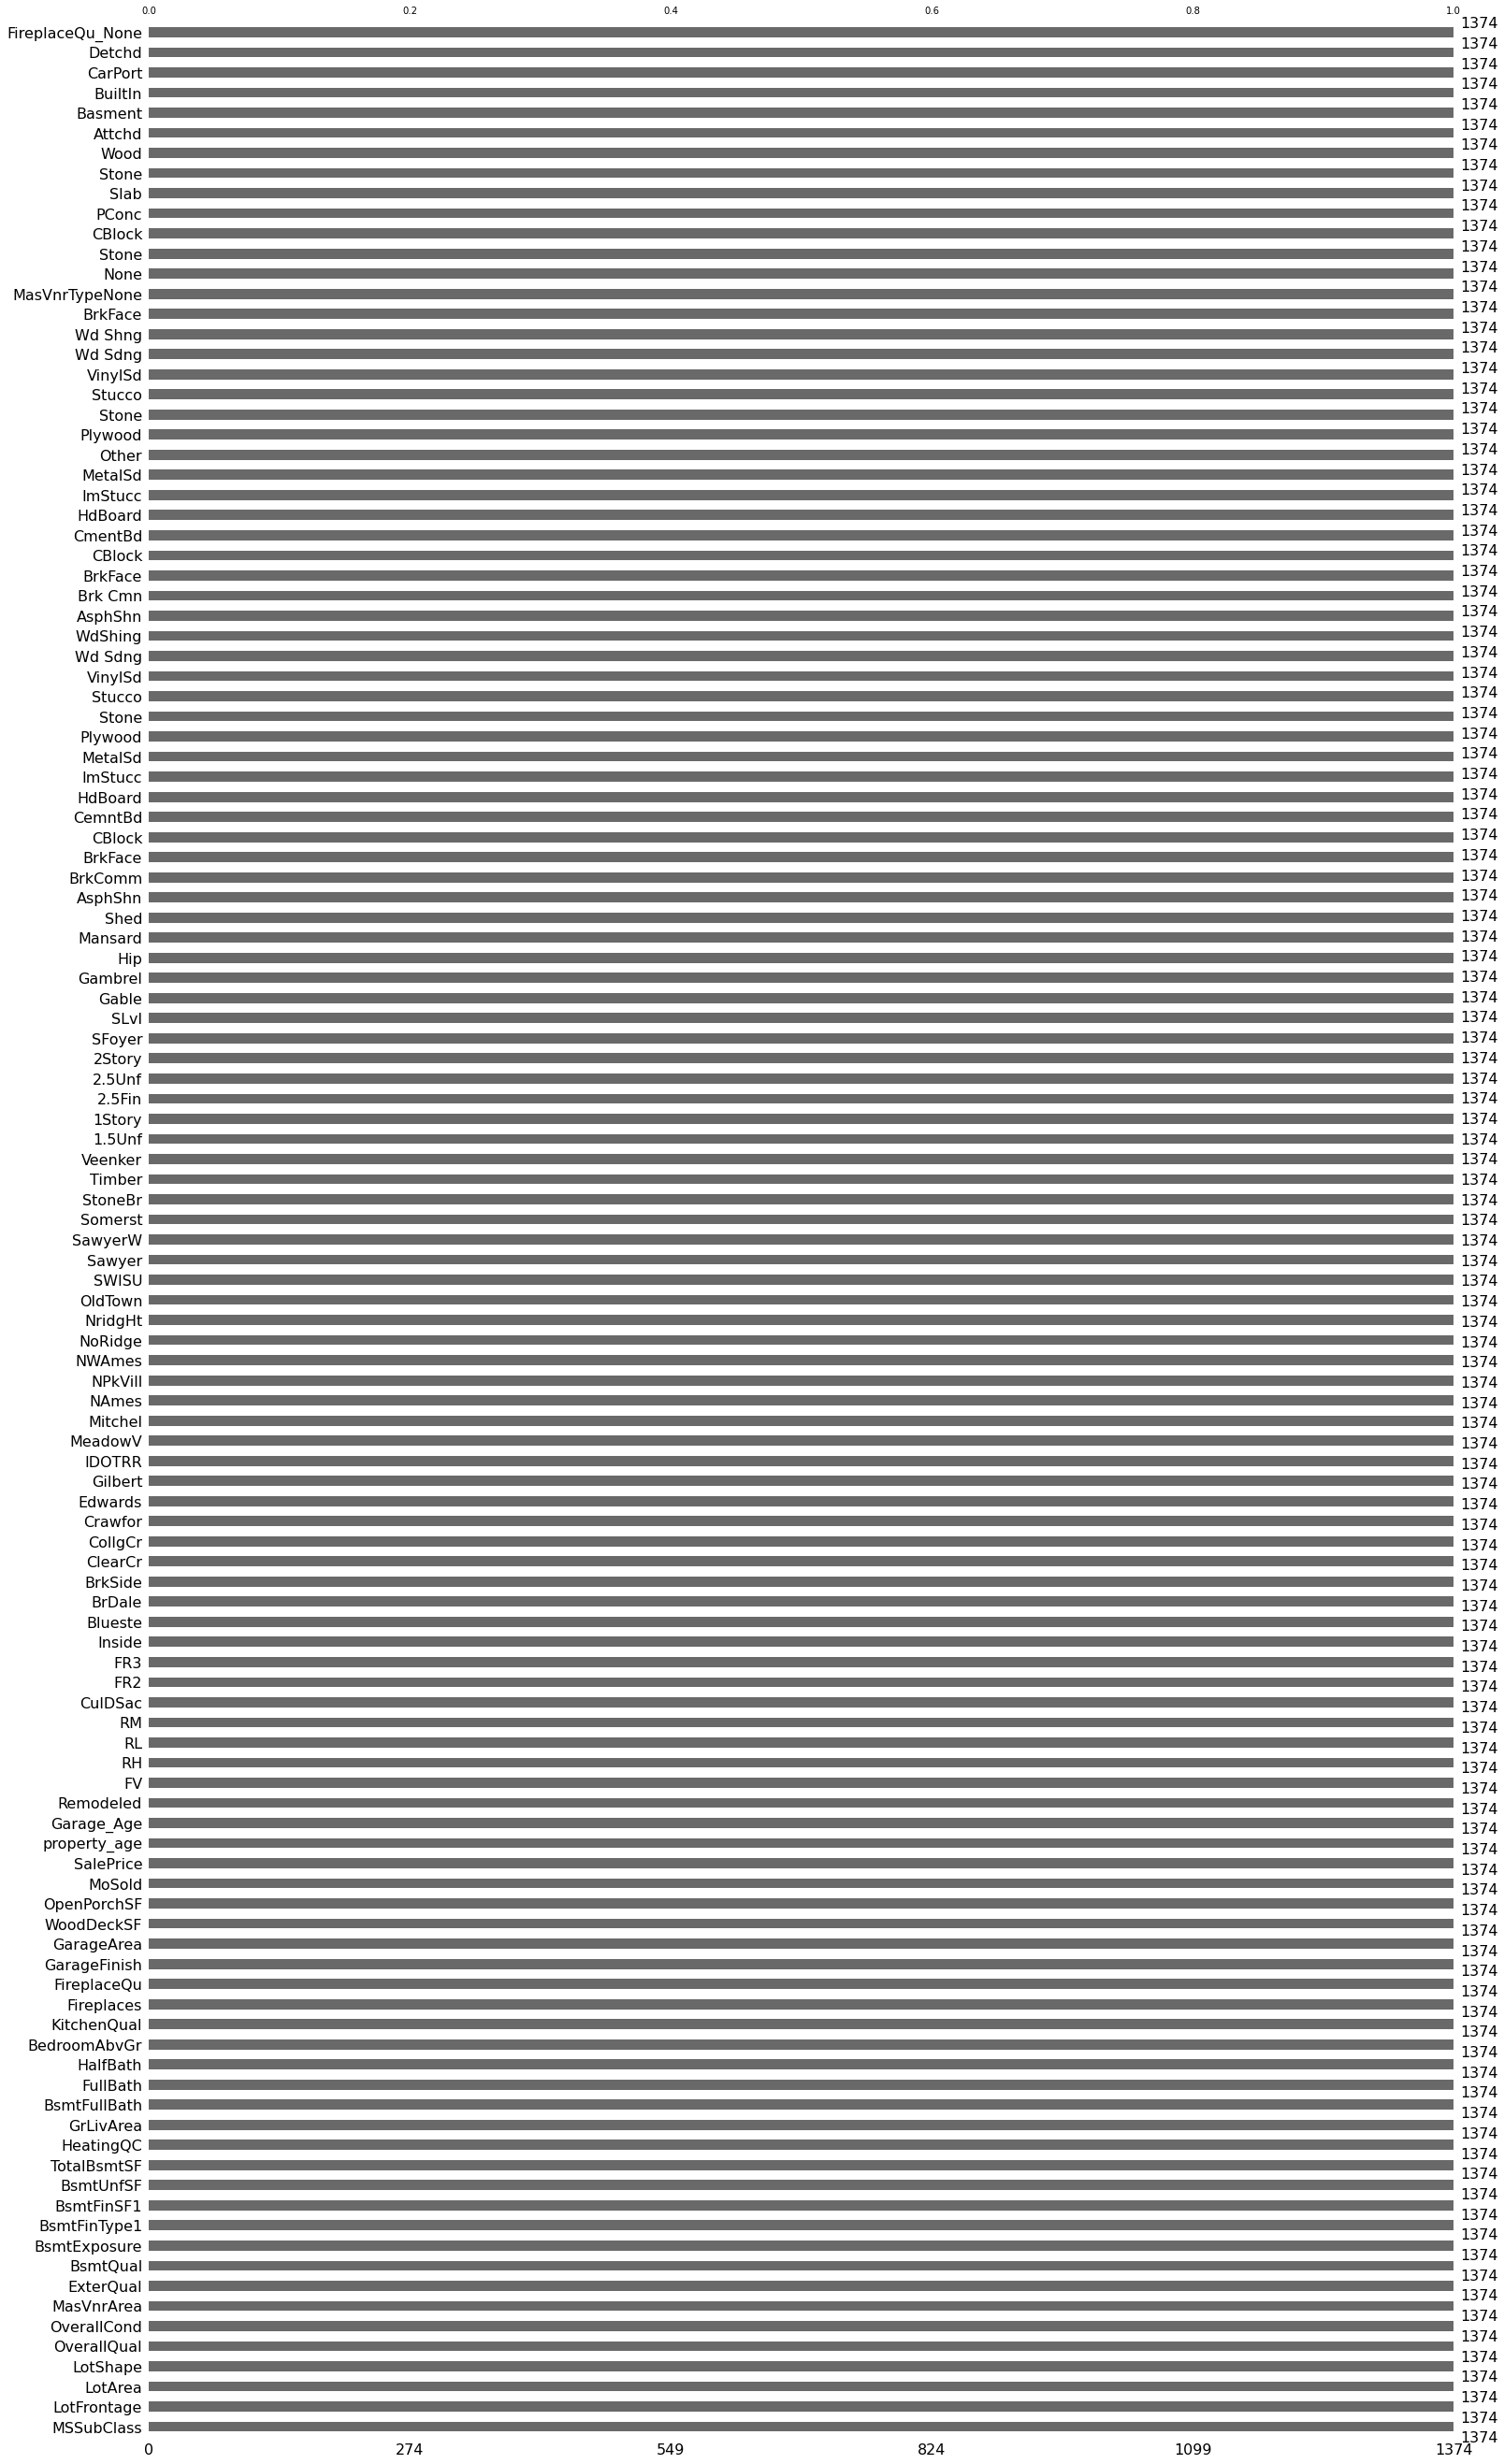

In [45]:
import missingno as msno
msno.bar(data)
plt.show()

In [46]:
data.shape

(1374, 120)

## Rescaling the Features

In [47]:
# Create X and y
data_new = data.copy()
y = data_new.pop('SalePrice')
X = data_new

In [48]:
sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])

In [49]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

In [50]:
"""# Create X_train and y_train
y_train = train.pop('SalePrice')
X_train = train
# Create X_test and y_test
y_test = test.pop('SalePrice')
X_test = test"""

"# Create X_train and y_train\ny_train = train.pop('SalePrice')\nX_train = train\n# Create X_test and y_test\ny_test = test.pop('SalePrice')\nX_test = test"

In [51]:
y_train.shape

(1099,)

In [52]:
y_test.shape

(275,)

## Recursive Feature Elimination

In [53]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [54]:
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', False, 57),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 15),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 10),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 29),
 ('KitchenQual', True, 1),
 ('Fireplaces', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageFinish', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('MoSold', False, 65),
 ('property_age', True, 1),
 ('Garage_Age', False, 33),
 ('Remodeled', False, 63),
 ('FV', True, 1),
 ('RH', True, 1),
 ('RL', True, 1),
 ('RM', True, 1),
 ('CulDSac', True, 1),
 ('FR2', False, 18),
 ('FR3', False, 52),
 ('Inside', False, 42),
 ('Blueste', False, 

In [55]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'BsmtFullBath',
       'HalfBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'property_age', 'FV', 'RH',
       'RL', 'RM', 'CulDSac', 'BrDale', 'BrkSide', 'Crawfor', 'Edwards',
       'MeadowV', 'Mitchel', 'NridgHt', 'Somerst', 'StoneBr', 'BrkComm',
       'BrkFace', 'Stucco', 'HdBoard', 'Plywood', 'BrkFace', 'None', 'Stone',
       'PConc', 'Slab', 'Attchd', 'CarPort'],
      dtype='object')

In [56]:
X_train = X_train[col_rfe_sup]

In [57]:
X_test = X_test[col_rfe_sup]

In [58]:
X_train.shape

(1099, 60)

## Linear Regression

In [59]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.011083605013544
[-1.06761205e-02  1.14785922e-02  1.63718947e-02  5.86689673e-02
  4.93869675e-02  6.04658030e-03  8.73471950e-03  1.43164896e-02
  1.80674179e-02  1.99943445e-02 -1.12863777e-02  4.21476829e-02
  1.14070864e-02  1.20262000e-01  9.14268113e-03  1.06789048e-02
  1.25208465e-02  8.37951593e-03  8.59855719e-03  9.89411516e-03
  3.33353690e-02  8.16197179e-03  7.21341517e-03 -7.03967041e-02
  2.98904103e-02  1.34225712e-02  5.66543853e-02  3.35163042e-02
  7.17768691e-03 -5.76652598e-03  1.49856228e-02  2.65101984e-02
 -6.90646173e-03 -1.40226464e-02 -7.46427387e-03  1.65464814e-02
  1.50348984e-02  1.56334860e-02 -1.09915501e-02  3.78903875e+11
  4.38196841e+10  4.04256350e+10  1.04902938e-02 -5.53008968e-03
  7.64077657e-03 -1.41519794e-02  2.67894223e-03 -1.21091964e-02
 -3.78903875e+11 -4.38196841e+10 -4.04256350e+10  3.18086765e-02
  3.61686738e-03 -5.82278749e-03  1.99903605e-02  1.36152334e-03
  1.77562339e-02  1.01351112e-02  8.68486650e-03 -7.35763326e-03]


In [60]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2 train: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2 test: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss train:", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss train:",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mean square error train:",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mean square error test:",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train:  0.925650315081388
r2 test:  0.9105844575310097
rss train: 10.66379450207705
rss train: 3.3277604304513613
mean square error train: 0.00970317971071615
mean square error test: 0.012100947019823132


## Ridge Regression with 50 features from RFE

In [61]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3,0.31,0.32,.033,0.34,0.35,0.36,0.37, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.31, 0.32, 0.033, 0.34, 0.35, 0.36, 0.37,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [63]:
# Display Mean Scores
ridge_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
29        10.0         -0.070975        -0.077642                1
28         9.0         -0.070954        -0.077644                2
27         8.0         -0.070933        -0.077647                3
26         7.0         -0.070911        -0.077652                4
25         6.0         -0.070891        -0.077659                5
30          20         -0.071200        -0.077667                6
24         5.0         -0.070869        -0.077669                7
23         4.0         -0.070848        -0.077683                8
22         3.0         -0.070826        -0.077706                9
21         2.0         -0.070803        -0.077737               10
20         1.0         -0.070779        -0.077779               11
19         0.9         -0.070778        -0.077784               12
18         0.8         -0.070777        -0.077789               13
17         0.7         -0.070776        -0.077794               14
16         0.6         -0.070775        -0.077799               15
15         0.5         -0.070774        -0.077805               16
14         0.4         -0.070773        -0.077811               17
13        0.37         -0.070773        -0.077813               18
12        0.36         -0.070773        -0.077813               19
11        0.35         -0.070772        -0.077814               20
10        0.34         -0.070772        -0.077815               21
8         0.32         -0.070772        -0.077816               22
7         0.31         -0.070772        -0.077817               23
6          0.3         -0.070772        -0.077818               24
5          0.2         -0.070771        -0.077825               25
4          0.1         -0.070770        -0.077832               26
3         0.05         -0.070770        -0.077836               27
9        0.033         -0.070770        -0.077837               28
2         0.01         -0.070769        -0.077839               29
1        0.001         -0.070769        -0.077839               30
0       0.0001         -0.070769        -0.077839               31
31          50         -0.072006        -0.078111               32
32         100         -0.073584        -0.079367               33
33         500         -0.083352        -0.087351               34
34        1000         -0.092386        -0.095356               35

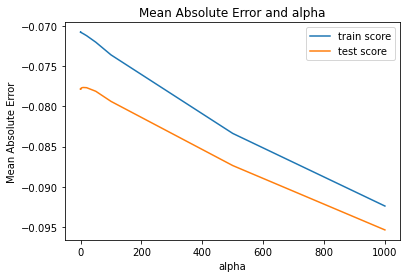

In [64]:
# plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Mean Absolute Error')
plt.title("Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [65]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.010816    0.01137938  0.01637628  0.05861952  0.04940505  0.00607795
  0.00863854  0.01438308  0.01802847  0.02016389 -0.01124074  0.04210495
  0.01142986  0.12040563  0.00904613  0.01068146  0.01251526  0.0084043
  0.00852352  0.00985198  0.03337338  0.00812694  0.00719571 -0.07039366
  0.02975263  0.01336126  0.0565593   0.03335704  0.00722999 -0.00584337
  0.01494697  0.02642875 -0.00692827 -0.01399458 -0.00748987  0.01648106
  0.01509481  0.01571839 -0.01097815  0.00888412 -0.00049812  0.01595908
  0.01042707 -0.0054726   0.0075123  -0.01404538  0.00275018 -0.01220183
  0.00888412 -0.00049812  0.01595908  0.03178422  0.00362438 -0.00581613
  0.02006103  0.00139806  0.01779804  0.01011794  0.00855827 -0.00740511]


In [66]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train_R2: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test_R2: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train_RSS: ", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test_RSS: ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train_MSE: ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test_MSE: ", mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train_R2:  0.9256511863530998
Test_R2:  0.9105895837640137
Train_RSS:  10.663669537694211
Test_RSS:  3.3275696484589146
Train_MSE:  0.00970306600336143
Test_MSE:  0.012100253267123325


In [67]:
# Creating a dataframe with top 10 features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(for sorting)':abs(ridge.coef_.round(4))})

# Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(for sorting)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

# Dataframe rdige_df
ridge_df.head(10) 

Features  Coefficient  Abs_Coefficient_Ridge(for sorting)
0     GrLivArea       0.1204                              0.1204
1  property_age      -0.0704                              0.0704
2   OverallQual       0.0586                              0.0586
3            RL       0.0566                              0.0566
4   OverallCond       0.0494                              0.0494
5   TotalBsmtSF       0.0421                              0.0421
6    GarageArea       0.0334                              0.0334
7            RM       0.0334                              0.0334
8          None       0.0318                              0.0318
9            FV       0.0298                              0.0298

**Residual Analysis of Model**

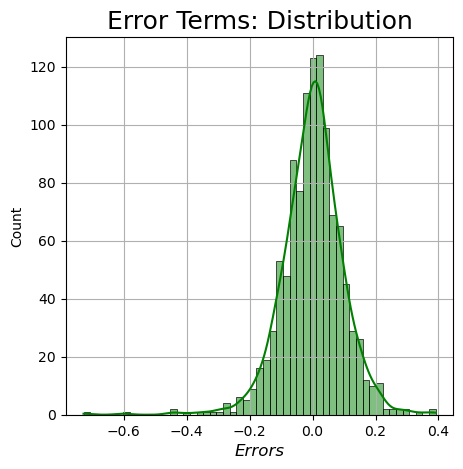

In [68]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train)    
sns.histplot(res ,color='g', kde=True)
plt.title('Error Terms: Distribution', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

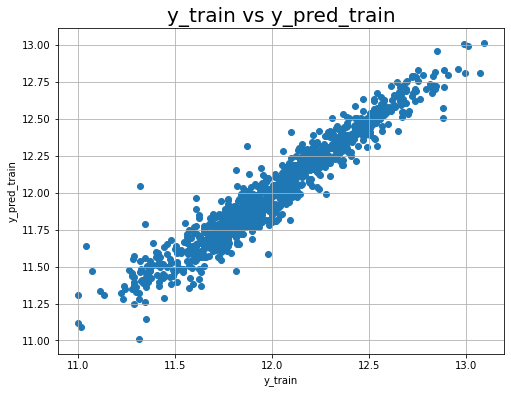

In [69]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train)
plt.title('y_train vs y_pred_train',fontsize = 20)           
plt.xlabel('y_train')              
plt.ylabel('y_pred_train') 
plt.grid(True)
plt.show()

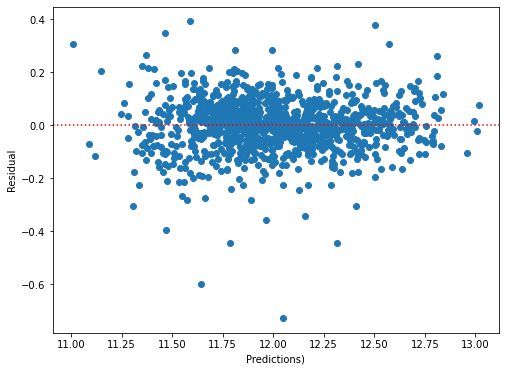

In [70]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_train, res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions)")
plt.ylabel("Residual")
plt.show()

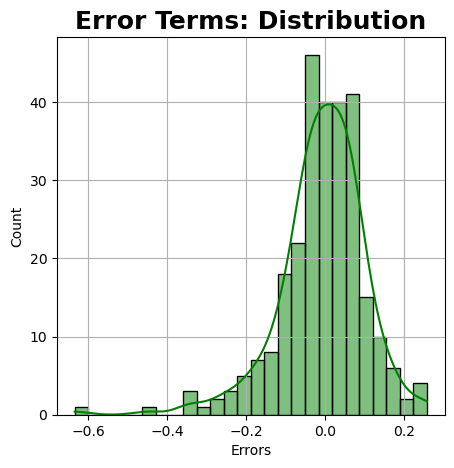

In [71]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test)  
sns.histplot(res, color='g', kde=True)
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors') 
plt.grid(True)
plt.show()

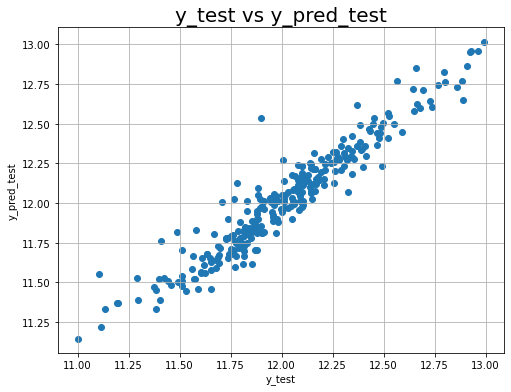

In [72]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred_test)
plt.title('y_test vs y_pred_test', fontsize = 20)           
plt.xlabel('y_test')              
plt.ylabel('y_pred_test') 
plt.grid(True)
plt.show()

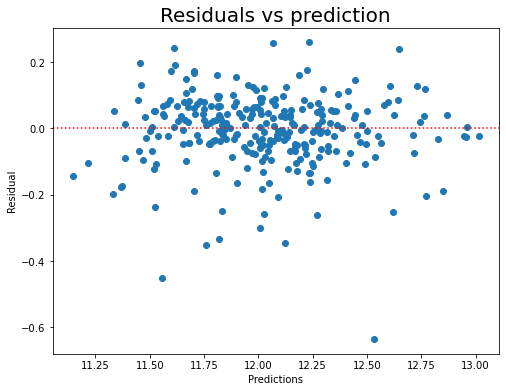

In [73]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_test, res)
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Residuals vs prediction', fontsize = 20)           
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

## Lasso Regression with 50 features from RFE

In [74]:
##Lasso Regression Model. 
lasso = Lasso()

# List of alphas (lambda parameter)
params_1 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3,0.31,0.32,.033,0.34,0.35,0.36,0.37, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# Cross-Validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.31, 0.32, 0.033, 0.34, 0.35, 0.36, 0.37,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
# Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1        0.001         -0.071256        -0.077448                1
0       0.0001         -0.070788        -0.077789                2
2         0.01         -0.078878        -0.082938                3
9        0.033         -0.097852        -0.100386                4
3         0.05         -0.109944        -0.112201                5
4          0.1         -0.150615        -0.152444                6
5          0.2         -0.229137        -0.230079                7
6          0.3         -0.288684        -0.288840                8
32         100         -0.289172        -0.289280                9
31          50         -0.289172        -0.289280                9
22         3.0         -0.289172        -0.289280                9
30          20         -0.289172        -0.289280                9
29        10.0         -0.289172        -0.289280                9
28         9.0         -0.289172        -0.289280                9
27         8.0         -0.289172        -0.289280                9
26         7.0         -0.289172        -0.289280                9
25         6.0         -0.289172        -0.289280                9
24         5.0         -0.289172        -0.289280                9
23         4.0         -0.289172        -0.289280                9
21         2.0         -0.289172        -0.289280                9
17         0.7         -0.289172        -0.289280                9
19         0.9         -0.289172        -0.289280                9
18         0.8         -0.289172        -0.289280                9
33         500         -0.289172        -0.289280                9
16         0.6         -0.289172        -0.289280                9
15         0.5         -0.289172        -0.289280                9
14         0.4         -0.289172        -0.289280                9
13        0.37         -0.289172        -0.289280                9
12        0.36         -0.289172        -0.289280                9
11        0.35         -0.289172        -0.289280                9
10        0.34         -0.289172        -0.289280                9
8         0.32         -0.289172        -0.289280                9
7         0.31         -0.289172        -0.289280                9
20         1.0         -0.289172        -0.289280                9
34        1000         -0.289172        -0.289280                9

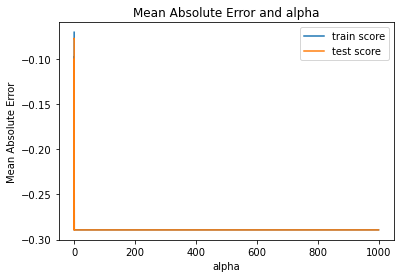

In [76]:
# Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Mean Absolute Error')

plt.title("Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [77]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [78]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  12.011195127505953
Coefficients:
  [-0.01014976  0.01073905  0.0158311   0.0625764   0.04917466  0.00506582
  0.0093085   0.01299602  0.01778281  0.02698115 -0.00273039  0.03425863
  0.01102371  0.11971127  0.00870424  0.00939019  0.01316533  0.00788304
  0.00898092  0.00994088  0.03354118  0.00809859  0.0072622  -0.07141885
  0.00631393  0.00058986  0.01301132 -0.00422599  0.00604267 -0.00512422
  0.01326259  0.02532504 -0.00564649 -0.01310914 -0.00596113  0.01532059
  0.01420175  0.01420903 -0.01008756  0.01466517  0.          0.00049729
  0.00527239 -0.00029487 -0.         -0.00556792 -0.         -0.00706581
  0.00128896  0.          0.00104874  0.          0.00139623 -0.00376346
  0.00140236 -0.          0.01619967  0.00785014  0.00825584 -0.00633367]


In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train_R2: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test_R2: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train_RSS: ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test_RSS: ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train_MSE: ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test_MSE: ", mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train_R2:  0.92445352100611
Test_R2:  0.9107870851920518
Train_RSS:  10.835447765894353
Test_RSS:  3.320219277158412
Train_MSE:  0.009859370123652731
Test_MSE:  0.012073524644212408


In [80]:
# Creating a dataframe of top 10 features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(for sorting)':abs(lasso.coef_.round(4))})
# Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(for sorting)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(for sorting)
0     GrLivArea       0.1197                              0.1197
1  property_age      -0.0714                              0.0714
2   OverallQual       0.0626                              0.0626
3   OverallCond       0.0492                              0.0492
4   TotalBsmtSF       0.0343                              0.0343
5    GarageArea       0.0335                              0.0335
6    BsmtFinSF1       0.0270                              0.0270
7       Crawfor       0.0253                              0.0253
8  BsmtExposure       0.0178                              0.0178
9         PConc       0.0162                              0.0162

In [81]:
# Creating the list of top 5 features from Lasso Regression Model
top5_original_lasso_features = list(lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

['GrLivArea', 'property_age', 'OverallQual', 'OverallCond', 'TotalBsmtSF']

**Residual Analysis of Model**

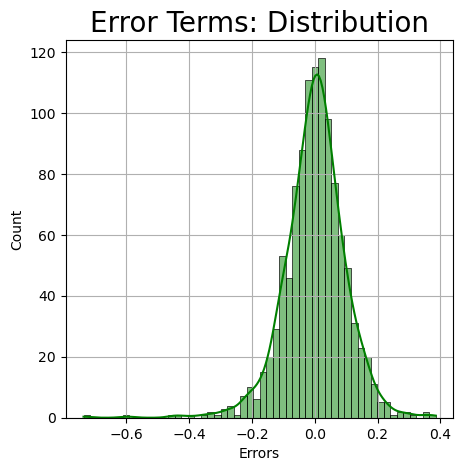

In [82]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train)     #residuals
sns.histplot(res1 , color='g', kde=True)
plt.title('Error Terms: Distribution', fontsize = 20)               
plt.xlabel('Errors') 
plt.grid(True)
plt.show()

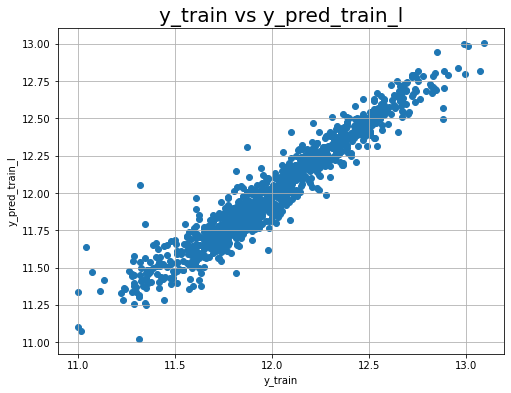

In [83]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train)
plt.title('y_train vs y_pred_train_l', fontsize = 20)           
plt.xlabel('y_train')              
plt.ylabel('y_pred_train_l') 
plt.grid(True)
plt.show()

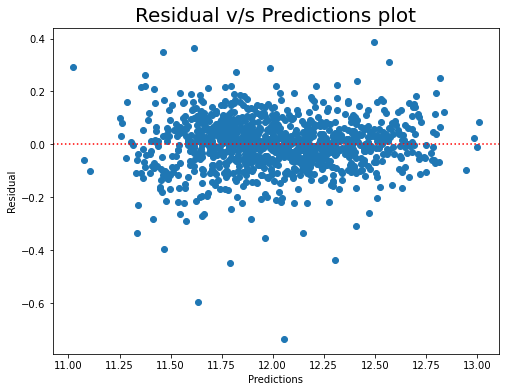

In [84]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_train, res1)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title("Residual v/s Predictions plot", fontsize = 20)
plt.show()

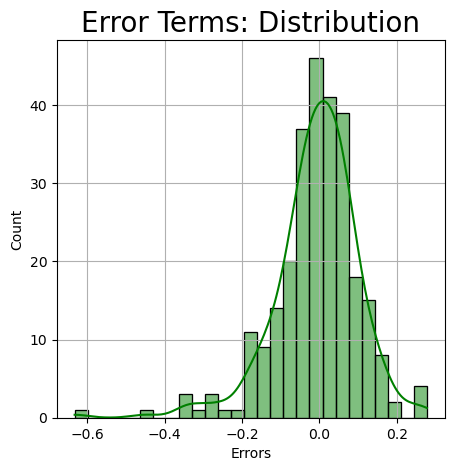

In [85]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test)     #residuals
sns.histplot(res1 , color='g', kde=True)
plt.title('Error Terms: Distribution', fontsize = 20)               
plt.xlabel('Errors') 
plt.grid(True)
plt.show()

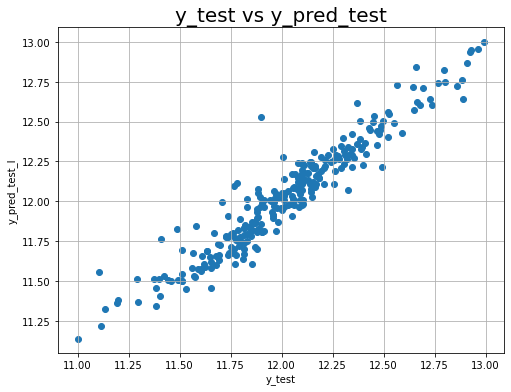

In [86]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred_test)
plt.title('y_test vs y_pred_test',fontsize = 20)           
plt.xlabel('y_test')              
plt.ylabel('y_pred_test_l') 
plt.grid(True)
plt.show()

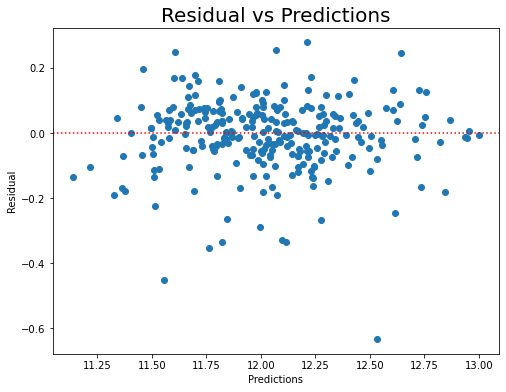

In [87]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_test, res1)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title("Residual vs Predictions",fontsize = 20)
plt.show()

In [88]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.925650          0.925651          0.924454
1   R2 Score (Test)           0.910584          0.910590          0.910787
2       RSS (Train)          10.663795         10.663670         10.835448
3        RSS (Test)           3.327760          3.327570          3.320219
4       MSE (Train)           0.098505          0.098504          0.099294
5        MSE (Test)           0.110004          0.110001          0.109880

## Ridge Regression with all features

In [89]:
# Create X and y
data_new1 = data.copy()
y = data_new1.pop('SalePrice')
X = data_new1

In [90]:
sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])

In [91]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

In [92]:
y_train.shape

(1099,)

In [93]:
y_test.shape

(275,)

In [94]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,31,32,33,34,35, 40, 41, 42, 43, 44, 50, 51, 52, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 3
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 41 candidates, totalling 123 fits


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   31, 32, 33, 34, 35, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 33}


In [96]:
##Display Mean Scores
ridge_cv_results = pd.DataFrame(model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
27          33         -0.069035        -0.082562                1
26          32         -0.068994        -0.082562                2
28          34         -0.069076        -0.082562                3
25          31         -0.068953        -0.082564                4
29          35         -0.069116        -0.082565                5
24          30         -0.068911        -0.082566                6
30          40         -0.069309        -0.082587                7
31          41         -0.069348        -0.082593                8
32          42         -0.069386        -0.082600                9
33          43         -0.069424        -0.082609               10
34          44         -0.069462        -0.082619               11
23          20         -0.068510        -0.082649               12
35          50         -0.069691        -0.082681               13
36          51         -0.069729        -0.082692               14
37          52         -0.069767        -0.082704               15
22        10.0         -0.068107        -0.082922               16
21         9.0         -0.068067        -0.082970               17
20         8.0         -0.068028        -0.083021               18
19         7.0         -0.067988        -0.083076               19
18         6.0         -0.067945        -0.083137               20
17         5.0         -0.067903        -0.083204               21
16         4.0         -0.067861        -0.083283               22
15         3.0         -0.067825        -0.083372               23
38         100         -0.071447        -0.083469               24
14         2.0         -0.067793        -0.083487               25
13         1.0         -0.067767        -0.083630               26
12         0.9         -0.067765        -0.083646               27
11         0.8         -0.067763        -0.083662               28
10         0.7         -0.067761        -0.083679               29
9          0.6         -0.067759        -0.083696               30
8          0.5         -0.067757        -0.083713               31
7          0.4         -0.067754        -0.083730               32
6          0.3         -0.067752        -0.083748               33
5          0.2         -0.067750        -0.083765               34
4          0.1         -0.067748        -0.083783               35
3         0.05         -0.067747        -0.083792               36
2         0.01         -0.067747        -0.083799               37
1        0.001         -0.067747        -0.083800               38
0       0.0001         -0.067747        -0.083801               39
39         500         -0.081068        -0.089284               40
40        1000         -0.089522        -0.095705               41

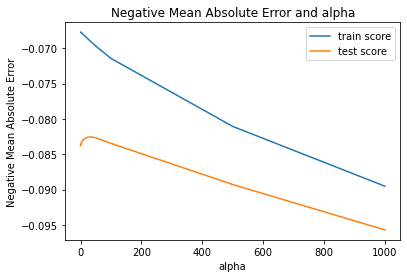

In [97]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [98]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 33
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.55649652e-02  1.11954625e-02  1.86895404e-02 -1.14069452e-03
  5.75323531e-02  4.51812151e-02  5.60928429e-03  8.70416477e-03
  1.46192949e-02  1.56950165e-02  6.07523555e-03  2.18652831e-02
 -4.70449014e-03  4.09655232e-02  1.22007001e-02  9.70147441e-02
  1.00280023e-02  1.43799050e-02  1.76051462e-02  8.46162611e-04
  1.42516328e-02  9.27042148e-03  9.44106562e-03  8.09979306e-03
  3.21130040e-02  8.27199567e-03  7.71390807e-03  2.43452855e-04
 -5.34522848e-02 -4.98178188e-03  4.59767170e-04  1.02981857e-02
  4.26775017e-03  2.10445835e-02  1.96486065e-03  7.19469809e-03
 -4.64129753e-03 -1.22128257e-03  2.22202412e-03  7.31720355e-04
 -7.13257138e-03  1.19405434e-02  8.30790947e-04 -6.44608191e-03
  2.37717965e-02 -1.22967516e-02 -5.58538575e-03 -2.43520358e-03
 -1.81840095e-02 -9.52714426e-03 -8.49221385e-03  1.79457048e-03
 -8.36746567e-03  1.73439775e-03  1.34092558e-02 -3.68174430e-03
  1.95478343e-04 -6.91680282e-03 -5.17593319e-03  1.11215397e-02
  1.44943183e-02 -3.11909

In [99]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train_R2: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test_R2: ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train_RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test_RSS: ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train_MSE: ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test_MSE: ", mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train_R2:  0.9269140011785715
Test_R2:  0.9127679513418698
Train_RSS:  10.482547078227874
Test_RSS:  3.2464977762943867
Train_MSE:  0.00953825939784156
Test_MSE:  0.011805446459252316


In [100]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(for sorting)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(for sorting)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

Features  Coefficient  Abs_Coefficient_Ridge(for sorting)
0     GrLivArea       0.0970                              0.0970
1   OverallQual       0.0575                              0.0575
2  property_age      -0.0535                              0.0535
3   OverallCond       0.0452                              0.0452
4   TotalBsmtSF       0.0410                              0.0410
5    GarageArea       0.0321                              0.0321
6       Crawfor       0.0238                              0.0238
7    BsmtFinSF1       0.0219                              0.0219
8            RL       0.0210                              0.0210
9         PConc       0.0189                              0.0189

**Residual Analysis of Model**

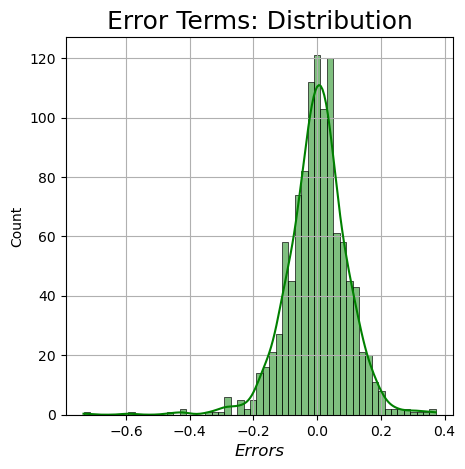

In [101]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train)    
sns.histplot(res ,color='g', kde=True)
plt.title('Error Terms: Distribution', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

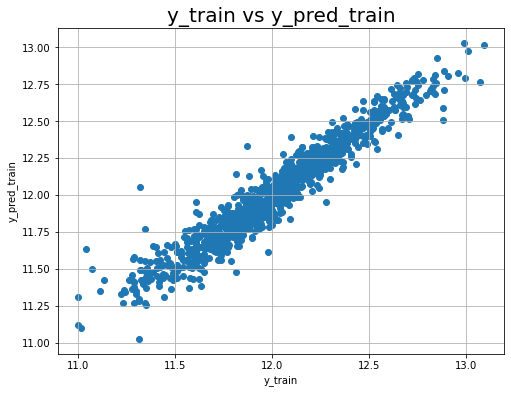

In [102]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train)
plt.title('y_train vs y_pred_train',fontsize = 20)           
plt.xlabel('y_train')              
plt.ylabel('y_pred_train') 
plt.grid(True)
plt.show()

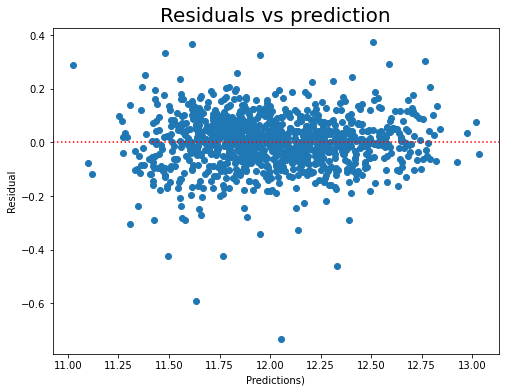

In [103]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_train, res)
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Residuals vs prediction', fontsize = 20) 
plt.xlabel("Predictions)")
plt.ylabel("Residual")
plt.show()

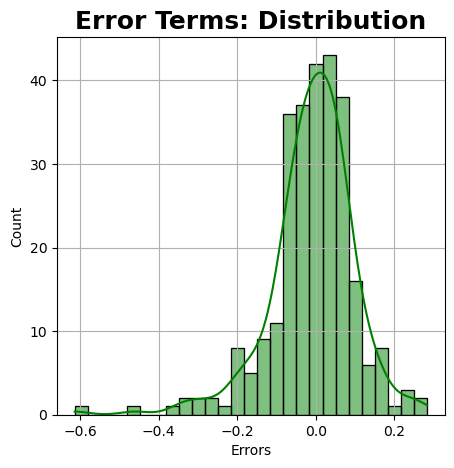

In [104]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test)  
sns.histplot(res, color='g', kde=True)
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors') 
plt.grid(True)
plt.show()

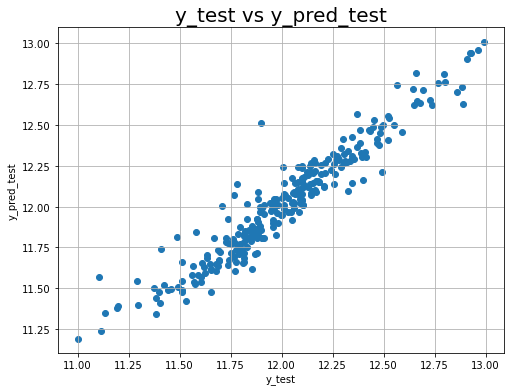

In [105]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred_test)
plt.title('y_test vs y_pred_test', fontsize = 20)           
plt.xlabel('y_test')              
plt.ylabel('y_pred_test') 
plt.grid(True)
plt.show()

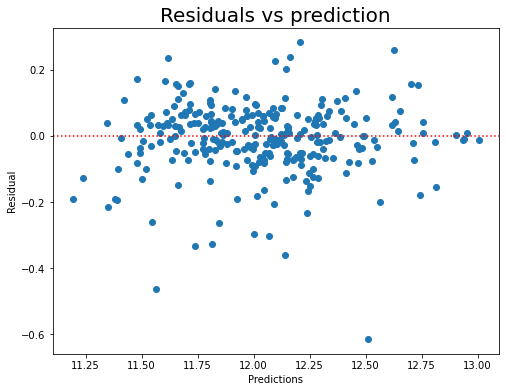

In [106]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_test, res)
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Residuals vs prediction', fontsize = 20)           
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Doubling the alpha value for ridge regression

In [107]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 66
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.46882339e-02  1.15180210e-02  1.85853599e-02 -1.50080234e-03
  5.60930406e-02  4.25943220e-02  6.21716711e-03  1.03624895e-02
  1.54094369e-02  1.56317269e-02  7.00151586e-03  2.30485180e-02
 -1.94397451e-03  3.96089245e-02  1.26377775e-02  8.66632826e-02
  1.01817268e-02  1.70538811e-02  1.86344722e-02  2.96233357e-03
  1.58450914e-02  1.04256133e-02  1.01262455e-02  8.61640052e-03
  3.25514887e-02  8.51043632e-03  8.14381342e-03  5.04260928e-04
 -4.48480062e-02 -5.86637007e-03  9.21275157e-04  7.53089720e-03
  2.47794613e-03  1.47054212e-02 -2.79083545e-03  7.23429757e-03
 -4.92810452e-03 -1.26860845e-03  2.29106520e-03  8.05398178e-04
 -6.91686082e-03  1.08197566e-02  1.79734818e-03 -4.94349676e-03
  2.35564874e-02 -1.19788994e-02 -4.88539743e-03 -3.65555587e-03
 -1.81154762e-02 -8.22606062e-03 -7.32245726e-03  1.66549860e-03
 -7.04839472e-03  3.10550288e-03  1.37837740e-02 -4.83540074e-03
 -1.65097231e-04 -6.37771273e-03 -3.82172083e-03  1.12279264e-02
  1.48032629e-02  4.31296

In [108]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("Train_R2: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test_R2: ", r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train_RSS: ", rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test_RSS: ", rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train_MSE: ", mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test_MSE: ", mse_test_lr)


Train_R2:  0.9257223510660966
Test_R2:  0.9121039101147994
Train_RSS:  10.653462555969579
Test_RSS:  3.271211266350096
Train_MSE:  0.009693778485868589
Test_MSE:  0.01189531369581853


In [109]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(for sorting)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(for sorting)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

Features  Coefficient  Abs_Coefficient_Ridge(for sorting)
0     GrLivArea       0.0867                              0.0867
1   OverallQual       0.0561                              0.0561
2  property_age      -0.0448                              0.0448
3   OverallCond       0.0426                              0.0426
4   TotalBsmtSF       0.0396                              0.0396
5    GarageArea       0.0326                              0.0326
6       Crawfor       0.0236                              0.0236
7    BsmtFinSF1       0.0230                              0.0230
8       LotArea       0.0186                              0.0186
9      HalfBath       0.0186                              0.0186

## Lasso Regression with all features

In [110]:
##Lasso Regression Model. 
lasso = Lasso()

# List of alphas (lambda parameter)
params_1 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3,0.31,0.32,.033,0.34,0.35,0.36,0.37, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# Cross-Validation
folds = 3
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 35 candidates, totalling 105 fits


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.31, 0.32, 0.033, 0.34, 0.35, 0.36, 0.37,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
# Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1        0.001         -0.069054        -0.080144                1
2         0.01         -0.078434        -0.082858                2
0       0.0001         -0.067808        -0.082918                3
9        0.033         -0.097526        -0.100432                4
3         0.05         -0.109747        -0.112214                5
4          0.1         -0.150020        -0.152263                6
5          0.2         -0.228318        -0.228854                7
32         100         -0.289134        -0.289344                8
31          50         -0.289134        -0.289344                8
30          20         -0.289134        -0.289344                8
21         2.0         -0.289134        -0.289344                8
29        10.0         -0.289134        -0.289344                8
28         9.0         -0.289134        -0.289344                8
27         8.0         -0.289134        -0.289344                8
26         7.0         -0.289134        -0.289344                8
25         6.0         -0.289134        -0.289344                8
24         5.0         -0.289134        -0.289344                8
23         4.0         -0.289134        -0.289344                8
22         3.0         -0.289134        -0.289344                8
20         1.0         -0.289134        -0.289344                8
17         0.7         -0.289134        -0.289344                8
18         0.8         -0.289134        -0.289344                8
33         500         -0.289134        -0.289344                8
16         0.6         -0.289134        -0.289344                8
15         0.5         -0.289134        -0.289344                8
14         0.4         -0.289134        -0.289344                8
13        0.37         -0.289134        -0.289344                8
12        0.36         -0.289134        -0.289344                8
11        0.35         -0.289134        -0.289344                8
10        0.34         -0.289134        -0.289344                8
8         0.32         -0.289134        -0.289344                8
7         0.31         -0.289134        -0.289344                8
6          0.3         -0.289134        -0.289344                8
19         0.9         -0.289134        -0.289344                8
34        1000         -0.289134        -0.289344                8

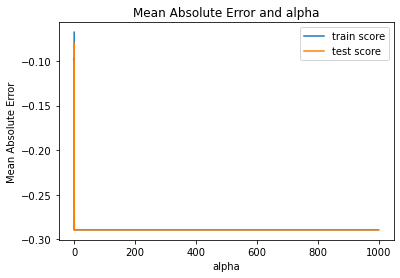

In [112]:
# Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Mean Absolute Error')

plt.title("Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [113]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [114]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  12.011380314025867
Coefficients:
  [-1.26014378e-02  9.85182280e-03  1.68191354e-02 -1.36828966e-04
  6.23129376e-02  4.80014490e-02  3.95217229e-03  8.03909413e-03
  1.28786525e-02  1.64615507e-02  5.46149680e-03  2.40912537e-02
 -2.17649157e-03  3.40116325e-02  1.12127758e-02  1.15518850e-01
  8.93276086e-03  6.21757905e-03  1.23168741e-02 -0.00000000e+00
  1.30269144e-02  7.77887764e-03  9.36911963e-03  9.40143889e-03
  3.29446268e-02  8.05068974e-03  6.89583325e-03  0.00000000e+00
 -6.72114372e-02 -2.85324320e-04  0.00000000e+00  6.38209192e-03
  9.15401945e-04  1.38679064e-02 -2.78825775e-03  6.08248384e-03
 -3.22640853e-03 -0.00000000e+00  6.15371223e-04  0.00000000e+00
 -5.03957795e-03  1.35834111e-02  1.03868641e-03 -0.00000000e+00
  2.59966526e-02 -5.94162118e-03 -0.00000000e+00 -0.00000000e+00
 -1.48361519e-02 -5.95769099e-03 -0.00000000e+00  2.67113516e-03
 -2.74093159e-03  2.72528830e-03  1.65310116e-02  0.00000000e+00
  8.31136626e-04 -1.40356485e-03 -1.1848211

In [115]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 =[]
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train_R2: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test_R2: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train_RSS: ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test_RSS: ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train_MSE: ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test_MSE: ", mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train_R2:  0.926177495078671
Test_R2:  0.9128757333160539
Train_RSS:  10.588182357078924
Test_RSS:  3.242486476033807
Train_MSE:  0.009634378850845246
Test_MSE:  0.011790859912850208


In [116]:
# Creating a dataframe of top 10 features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(for sorting)':abs(lasso.coef_.round(4))})
# Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(for sorting)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(for sorting)
0     GrLivArea       0.1155                              0.1155
1  property_age      -0.0672                              0.0672
2   OverallQual       0.0623                              0.0623
3   OverallCond       0.0480                              0.0480
4   TotalBsmtSF       0.0340                              0.0340
5    GarageArea       0.0329                              0.0329
6       Crawfor       0.0260                              0.0260
7    BsmtFinSF1       0.0241                              0.0241
8       LotArea       0.0168                              0.0168
9       NridgHt       0.0165                              0.0165

In [117]:
# Creating the list of top 5 features from Lasso Regression Model
top5_lasso_features = list(lasso_df['Features'].iloc[0:5])
top5_lasso_features

['GrLivArea', 'property_age', 'OverallQual', 'OverallCond', 'TotalBsmtSF']

**Residual Analysis of Model**

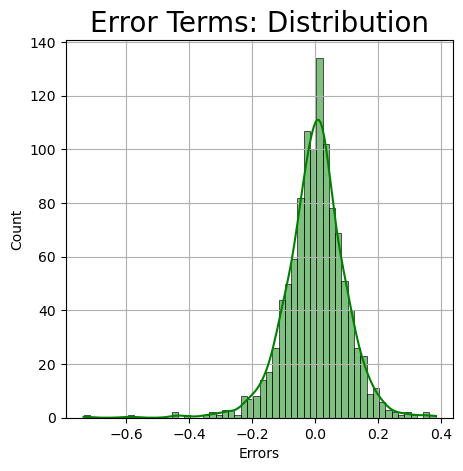

In [118]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train)     #residuals
sns.histplot(res1 , color='g', kde=True)
plt.title('Error Terms: Distribution', fontsize = 20)               
plt.xlabel('Errors') 
plt.grid(True)
plt.show()

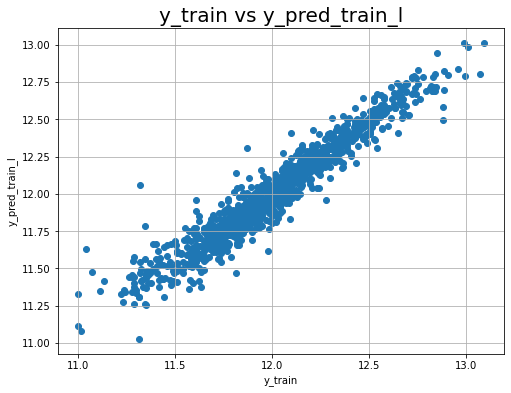

In [119]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train)
plt.title('y_train vs y_pred_train_l', fontsize = 20)           
plt.xlabel('y_train')              
plt.ylabel('y_pred_train_l') 
plt.grid(True)
plt.show()

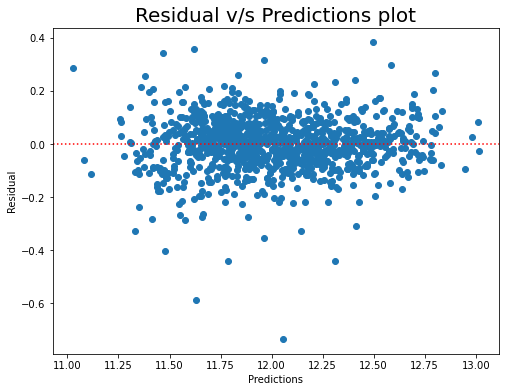

In [120]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_train, res1)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title("Residual v/s Predictions plot", fontsize = 20)
plt.show()

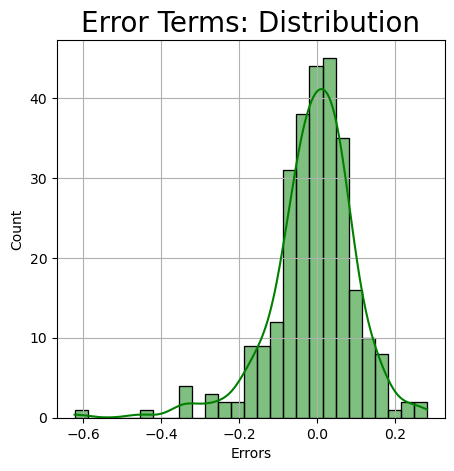

In [121]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test)     #residuals
sns.histplot(res1 , color='g', kde=True)
plt.title('Error Terms: Distribution', fontsize = 20)               
plt.xlabel('Errors') 
plt.grid(True)
plt.show()

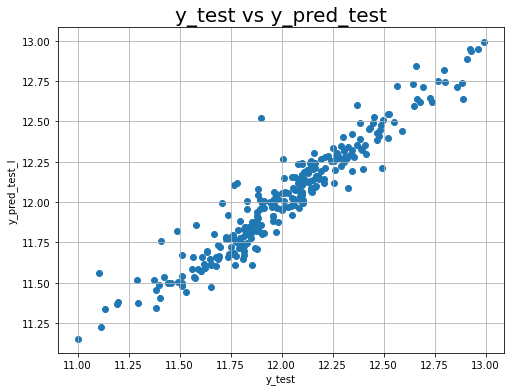

In [122]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred_test)
plt.title('y_test vs y_pred_test',fontsize = 20)           
plt.xlabel('y_test')              
plt.ylabel('y_pred_test_l') 
plt.grid(True)
plt.show()

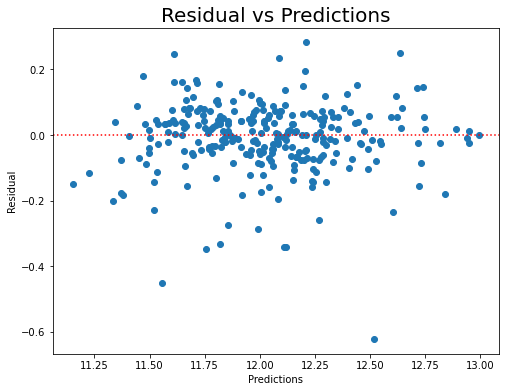

In [123]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_test, res1)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title("Residual vs Predictions",fontsize = 20)
plt.show()

### Doubling the alpha value of lasso regression

In [124]:
lasso = Lasso(alpha=0.002)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  12.011293225959413
Coefficients:
  [-1.13534982e-02  9.36974223e-03  1.58871523e-02 -0.00000000e+00
  6.51651368e-02  4.70163105e-02  4.23678801e-03  1.01337164e-02
  1.13705673e-02  1.59411943e-02  4.87944895e-03  2.63443477e-02
 -0.00000000e+00  3.19395532e-02  1.09721754e-02  1.16660860e-01
  8.15747867e-03  4.12920055e-03  1.00198679e-02 -0.00000000e+00
  1.36280074e-02  7.89195262e-03  9.65667351e-03  1.01706176e-02
  3.39470490e-02  7.62304619e-03  6.57534337e-03  0.00000000e+00
 -6.80285764e-02 -0.00000000e+00  0.00000000e+00  8.95716379e-04
 -0.00000000e+00  4.58227925e-03 -1.08243076e-02  4.92461126e-03
 -1.69187750e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.28936811e-03  1.18247521e-02  1.31147066e-05 -0.00000000e+00
  2.45773255e-02 -4.81388691e-03 -0.00000000e+00 -0.00000000e+00
 -1.26913863e-02 -4.81182410e-03 -0.00000000e+00  1.01760819e-03
 -1.47662640e-03  1.26278013e-03  1.47507020e-02 -0.00000000e+00
  0.00000000e+00 -1.26744667e-04 -9.6495402

In [125]:
# Checking the metrices after doubling the alpha value for lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("Train_R2: ", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test_R2: ",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train_RSS: ", rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test_RSS: ", rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train_MSE: ", mse_train_lr)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test_MSE: ", mse_test_lr)


Train_R2:  0.9245276718413202
Test_R2:  0.9118918166538416
Train_RSS:  10.824812491922387
Test_RSS:  3.2791047064327046
Train_MSE:  0.009849692895288796
Test_MSE:  0.011924017114300745


In [126]:
# checking top 10 variables after doubling the alpha value for lasso

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(for sorting)':abs(lasso.coef_.round(4))})
# Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(for sorting)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(for sorting)
0     GrLivArea       0.1167                              0.1167
1  property_age      -0.0680                              0.0680
2   OverallQual       0.0652                              0.0652
3   OverallCond       0.0470                              0.0470
4    GarageArea       0.0339                              0.0339
5   TotalBsmtSF       0.0319                              0.0319
6    BsmtFinSF1       0.0263                              0.0263
7       Crawfor       0.0246                              0.0246
8  BsmtExposure       0.0159                              0.0159
9       LotArea       0.0159                              0.0159

In [127]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.925650          0.926914          0.926177
1   R2 Score (Test)           0.910584          0.912768          0.912876
2       RSS (Train)          10.663795         10.482547         10.588182
3        RSS (Test)           3.327760          3.246498          3.242486
4       MSE (Train)           0.098505          0.097664          0.098155
5        MSE (Test)           0.110004          0.108653          0.108586

## Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [128]:
X_train.shape

(1099, 119)

In [129]:
# top5_lasso_features
X_train = X_train.drop(top5_lasso_features, axis=1)

In [130]:
X_train.shape

(1099, 114)

In [131]:
X_test.shape

(275, 119)

In [132]:
X_test = X_test.drop(top5_lasso_features, axis=1)

In [133]:
X_test.shape

(275, 114)

In [134]:
##Lasso Regression Model. 
lasso = Lasso()

# List of alphas (lambda parameter)
params_1 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3,0.31,0.32,.033,0.34,0.35,0.36,0.37, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# Cross-Validation
folds = 3
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 35 candidates, totalling 105 fits


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.31, 0.32, 0.033, 0.34, 0.35, 0.36, 0.37,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [135]:
# Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1        0.001         -0.088962        -0.104646                1
0       0.0001         -0.087048        -0.105282                2
2         0.01         -0.101344        -0.109107                3
9        0.033         -0.119695        -0.123265                4
3         0.05         -0.133752        -0.136880                5
4          0.1         -0.174779        -0.176881                6
5          0.2         -0.258224        -0.259170                7
32         100         -0.289134        -0.289344                8
31          50         -0.289134        -0.289344                8
30          20         -0.289134        -0.289344                8
21         2.0         -0.289134        -0.289344                8
29        10.0         -0.289134        -0.289344                8
28         9.0         -0.289134        -0.289344                8
27         8.0         -0.289134        -0.289344                8
26         7.0         -0.289134        -0.289344                8
25         6.0         -0.289134        -0.289344                8
24         5.0         -0.289134        -0.289344                8
23         4.0         -0.289134        -0.289344                8
22         3.0         -0.289134        -0.289344                8
20         1.0         -0.289134        -0.289344                8
17         0.7         -0.289134        -0.289344                8
18         0.8         -0.289134        -0.289344                8
33         500         -0.289134        -0.289344                8
16         0.6         -0.289134        -0.289344                8
15         0.5         -0.289134        -0.289344                8
14         0.4         -0.289134        -0.289344                8
13        0.37         -0.289134        -0.289344                8
12        0.36         -0.289134        -0.289344                8
11        0.35         -0.289134        -0.289344                8
10        0.34         -0.289134        -0.289344                8
8         0.32         -0.289134        -0.289344                8
7         0.31         -0.289134        -0.289344                8
6          0.3         -0.289134        -0.289344                8
19         0.9         -0.289134        -0.289344                8
34        1000         -0.289134        -0.289344                8

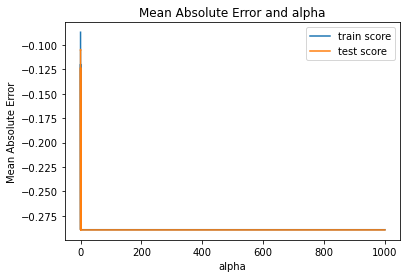

In [136]:
# Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Mean Absolute Error')

plt.title("Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [137]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [138]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  12.011506395222563
Coefficients:
  [-0.01781234  0.00928765  0.02361825 -0.          0.00881586  0.02788476
  0.03529254  0.02010955  0.00910014  0.0654401   0.04453088  0.02557331
  0.01007769  0.04810196  0.03498045  0.02014178  0.03900335  0.02127328
  0.01452613  0.01154309  0.05887225  0.01076906  0.01353816  0.00150794
  0.          0.00869276  0.          0.00182462  0.00719893  0.
  0.00820289 -0.00915333 -0.00039046  0.00131479  0.0014448  -0.00530774
  0.01139611  0.00649106 -0.00123684  0.03568207 -0.0155261  -0.00561978
 -0.01060669 -0.02572209 -0.00493039 -0.          0.00123877 -0.
  0.01060688  0.01697378 -0.00527458  0.         -0.00437571  0.
  0.01535195  0.02249845  0.          0.00795024 -0.00684499 -0.02869262
  0.01295376  0.00317193  0.00832539 -0.00324856 -0.         -0.01460406
  0.          0.          0.          0.          0.00364243 -0.01228262
  0.01626915 -0.00146263  0.         -0.          0.00020276  0.
 -0.          0.00942381  0.01360937

In [139]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train_R2: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test_R2: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train_RSS: ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test_RSS: ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train_MSE: ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test_MSE: ", mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train_R2:  0.8878969796502048
Test_R2:  0.8640443607405106
Train_RSS:  16.078663593275323
Test_RSS:  5.059833940853765
Train_MSE:  0.01463026714583742
Test_MSE:  0.018399396148559146


In [140]:
# Creating a dataframe of top 10 features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(for sorting)':abs(lasso.coef_.round(4))})
# Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(for sorting)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(for sorting)
0   BsmtFinSF1       0.0654                              0.0654
1   GarageArea       0.0589                              0.0589
2     FullBath       0.0481                              0.0481
3    BsmtUnfSF       0.0445                              0.0445
4  KitchenQual       0.0390                              0.0390
5      Crawfor       0.0357                              0.0357
6     BsmtQual       0.0353                              0.0353
7     HalfBath       0.0350                              0.0350
8       1Story      -0.0287                              0.0287
9    ExterQual       0.0279                              0.0279

In [141]:
# Creating the list of top 5 features from Lasso Regression Model
top5_lasso_features_2 = list(lasso_df['Features'].iloc[0:5])
top5_lasso_features_2

['BsmtFinSF1', 'GarageArea', 'FullBath', 'BsmtUnfSF', 'KitchenQual']

**Residual Analysis of Model**

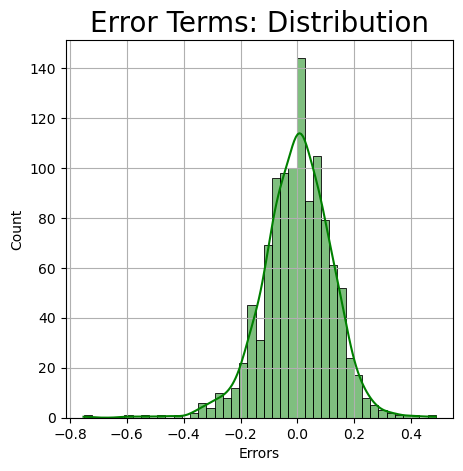

In [142]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train)     #residuals
sns.histplot(res1 , color='g', kde=True)
plt.title('Error Terms: Distribution', fontsize = 20)               
plt.xlabel('Errors') 
plt.grid(True)
plt.show()

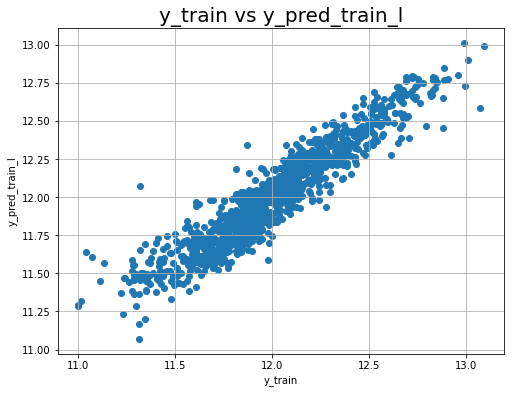

In [143]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train)
plt.title('y_train vs y_pred_train_l', fontsize = 20)           
plt.xlabel('y_train')              
plt.ylabel('y_pred_train_l') 
plt.grid(True)
plt.show()

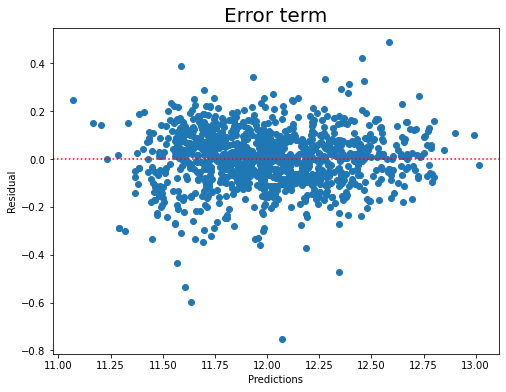

In [144]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_train, res1)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title("Error term", fontsize = 20)
plt.show()

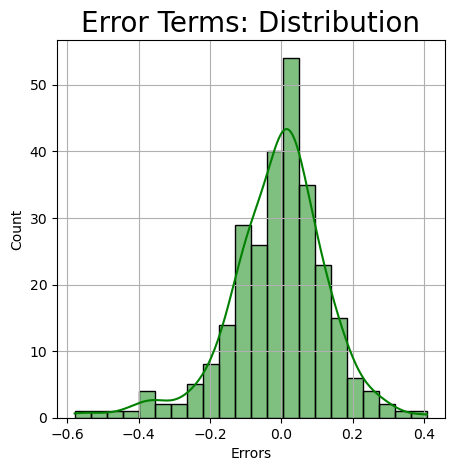

In [145]:
# Plot the histogram of the error terms

plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test)     #residuals
sns.histplot(res1 , color='g', kde=True)
plt.title('Error Terms: Distribution', fontsize = 20)               
plt.xlabel('Errors') 
plt.grid(True)
plt.show()

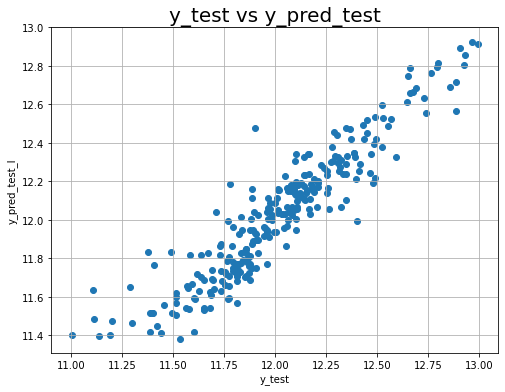

In [146]:
# Plotting y_train and y_train_pred to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred_test)
plt.title('y_test vs y_pred_test',fontsize = 20)           
plt.xlabel('y_test')              
plt.ylabel('y_pred_test_l') 
plt.grid(True)
plt.show()

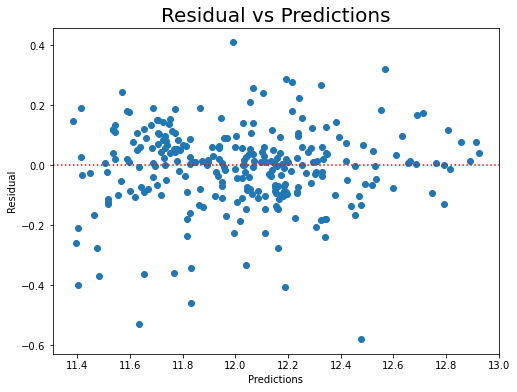

In [147]:
# Residual v/s Predictions plot
plt.figure(figsize = (8,6))
plt.scatter(y_pred_test, res1)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title("Residual vs Predictions",fontsize = 20)
plt.show()

### Top five variables after rebuiding the lasso regression model
- ['BsmtFinSF1', 'GarageArea', 'FullBath', 'BsmtUnfSF', 'KitchenQual']

In [148]:
top5_lasso_features_2

['BsmtFinSF1', 'GarageArea', 'FullBath', 'BsmtUnfSF', 'KitchenQual']